In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO
import requests

### Load dataset from OECD explorer

In [ ]:
# url = "https://sdmx.oecd.org/public/rest/data/OECD.ENV.EPI,DSD_GG@DF_GREEN_GROWTH,/FIN+NER+NGA+CAN+MYS+ZWE+ZAF+IND+IDN+AUS.A.RN_SC+RN_MOR+PB_SC+PB_MOR+O3_SC+O3_MOR+PM_SC+PM_MOR+PM_SPEX35+PM_SPEX10+PM_PWM+POP_NETMIGR+POP_LIFEEXP+POP_FERTILITY+POP_Y_GT65+POP_Y15T64+POP_Y_LT14+POP_F+SOC..?startPeriod=1990&endPeriod=2022&dimensionAtObservation=AllDimensions&format=csvfilewithlabels"
url = "https://sdmx.oecd.org/public/rest/data/OECD.ENV.EPI,DSD_GG@DF_GREEN_GROWTH,1.1/IND+SWE+JPN+SGP+DEU+AUS+ZAF+NGA+MEX+IDN+MOZ+MWI+LBR+MDG+YEM.A.RN_SC+RN_MOR+PB_SC+PB_MOR+O3_SC+O3_MOR+PM_SC+PM_MOR+PM_SPEX35+PM_SPEX10+PM_PWM+POPDEN+POP_NETMIGR+POP_FERTILITY+POP_LIFEEXP+POP_Y_GT65+POP_Y15T64+POP_Y_LT14+POP_F..?startPeriod=1990&dimensionAtObservation=AllDimensions"
headers = {
    'Accept': 'text/csv'
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
  data = StringIO(response.text)
  data = pd.read_csv(data)
else:
  print('Error:', response.status_code)

In [ ]:
data.head()

DATAFLOW REF_AREA FREQ    MEASURE  \
0  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)      IDN    A  PM_SPEX10   
1  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)      IDN    A  PM_SPEX10   
2  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)      IDN    A  PM_SPEX10   
3  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)      IDN    A  PM_SPEX10   
4  OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1)      IDN    A  PM_SPEX10   

  UNIT_MEASURE ACTIVITY  TIME_PERIOD  OBS_VALUE OBS_STATUS  OBS_STATUS_2  \
0       PT_POP       _T         2005      99.40          A           NaN   
1       PT_POP       _T         2004      99.41          A           NaN   
2       PT_POP       _T         2003      99.27          A           NaN   
3       PT_POP       _T         2002      99.41          A           NaN   
4       PT_POP       _T         2001      98.96          A           NaN   

   UNIT_MULT PRICE_BASE  BASE_PER  TIMELINESS  DECIMALS  
0          0         _Z       NaN           4         2  
1          0         _Z       NaN           4         2  
2          0         _Z       NaN           4         2  
3          0         _Z       NaN           4         2  
4          0         _Z       NaN           4         2

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8715 entries, 0 to 8714
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATAFLOW      8715 non-null   object 
 1   REF_AREA      8715 non-null   object 
 2   FREQ          8715 non-null   object 
 3   MEASURE       8715 non-null   object 
 4   UNIT_MEASURE  8715 non-null   object 
 5   ACTIVITY      8715 non-null   object 
 6   TIME_PERIOD   8715 non-null   int64  
 7   OBS_VALUE     8715 non-null   float64
 8   OBS_STATUS    8715 non-null   object 
 9   OBS_STATUS_2  0 non-null      float64
 10  UNIT_MULT     8715 non-null   int64  
 11  PRICE_BASE    8715 non-null   object 
 12  BASE_PER      0 non-null      float64
 13  TIMELINESS    8715 non-null   int64  
 14  DECIMALS      8715 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 1021.4+ KB


In [ ]:
tes = data['MEASURE'].unique()
tes

array(['PM_SPEX10', 'PB_MOR', 'PM_PWM', 'POP_Y_LT14', 'PM_SC',
       'POP_Y15T64', 'POP_FERTILITY', 'POPDEN', 'POP_Y_GT65', 'PM_MOR',
       'RN_MOR', 'O3_SC', 'PM_SPEX35', 'POP_F', 'PB_SC', 'POP_NETMIGR',
       'POP_LIFEEXP', 'RN_SC', 'O3_MOR'], dtype=object)

## EDA

### Slicing data

In [ ]:
df = data[['REF_AREA','MEASURE','TIME_PERIOD','OBS_VALUE']]
df.head()

REF_AREA    MEASURE  TIME_PERIOD  OBS_VALUE
0      IDN  PM_SPEX10         2005      99.40
1      IDN  PM_SPEX10         2004      99.41
2      IDN  PM_SPEX10         2003      99.27
3      IDN  PM_SPEX10         2002      99.41
4      IDN  PM_SPEX10         2001      98.96

rename column

In [ ]:
df.rename(columns = {'REF_AREA':'negara','MEASURE':'column_name','TIME_PERIOD':'tahun','OBS_VALUE':'value'},inplace=True)
df.head()

<ipython-input-7-1c71c77c4623>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'REF_AREA':'negara','MEASURE':'column_name','TIME_PERIOD':'tahun','OBS_VALUE':'value'},inplace=True)


negara column_name  tahun  value
0    IDN   PM_SPEX10   2005  99.40
1    IDN   PM_SPEX10   2004  99.41
2    IDN   PM_SPEX10   2003  99.27
3    IDN   PM_SPEX10   2002  99.41
4    IDN   PM_SPEX10   2001  98.96

mapping kategori negara

In [ ]:
df['negara'].unique()

array(['IDN', 'SWE', 'SGP', 'MDG', 'MOZ', 'MWI', 'LBR', 'DEU', 'IND',
       'JPN', 'AUS', 'ZAF', 'NGA', 'MEX', 'YEM'], dtype=object)

In [ ]:
kategori_negaara = {
   'YEM':'Miskin', 'MDG':'Miskin', 'LBR':'Miskin', 'MWI':'Miskin', 'MOZ':'Miskin',
    'IDN':'Berkembang', 'IND':'Berkembang', 'MEX':'Berkembang', 'NGA':'Berkembang', 'ZAF':'Berkembang',
    'AUS':'Maju', 'DEU':'Maju', 'SGP':'Maju', 'JPN':'Maju', 'SWE':'Maju'
}
df['kategori_negara'] = df['negara'].map(kategori_negaara)


<ipython-input-9-13193f75704c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kategori_negara'] = df['negara'].map(kategori_negaara)


In [ ]:
df.sample(10)

negara  column_name  tahun   value kategori_negara
6458    SGP        PB_SC   2012    0.24            Maju
2706    MOZ       PM_MOR   1995   44.79          Miskin
7337    SWE       PM_MOR   2005  147.06            Maju
5038    NGA       O3_MOR   1997    6.06      Berkembang
952     IND       PM_MOR   1994  313.70      Berkembang
4997    YEM  POP_NETMIGR   2005    0.67          Miskin
3390    MWI    PM_SPEX10   2002  100.00          Miskin
700     MWI       POPDEN   2003  128.84          Miskin
390     AUS   POP_Y_GT65   1991   11.24            Maju
6631    MOZ    PM_SPEX10   2016   99.96          Miskin

### pivotable

In [ ]:
df1 = df.pivot_table(index=['tahun','kategori_negara','negara'], columns='column_name', values='value')
df1.head(10)

column_name                   O3_MOR  O3_SC  PB_MOR  PB_SC  PM_MOR  PM_PWM  \
tahun kategori_negara negara                                                 
1990  Berkembang      IDN       2.22   0.02   74.49   0.75  212.71   26.86   
                      IND      49.48   0.50  131.74   1.32  320.01   58.31   
                      MEX      23.75   0.27   55.55   0.62  252.53   30.95   
                      NGA       7.79   0.08   40.65   0.41  234.54   59.24   
                      ZAF       4.64   0.05   29.87   0.34  338.67   23.70   
      Maju            AUS       3.17   0.03  102.17   1.06  139.19    7.17   
                      DEU      18.05   0.19   63.86   0.66  800.10   21.77   
                      JPN       7.16   0.07   29.84   0.31  242.32   12.57   
                      SGP       7.85   0.08   46.75   0.46  377.50   36.51   
                      SWE       7.50   0.08   41.96   0.43  314.52   10.44   

column_name                   PM_SC  PM_SPEX10  PM_SPEX35   POPDEN  POP_F  \
tahun kategori_negara negara                                                
1990  Berkembang      IDN      2.14      99.61      19.06    96.03  50.07   
                      IND      3.22      99.90      73.94   290.92  48.32   
                      MEX      2.82      99.95      26.19    42.27  50.85   
                      NGA      2.36      99.95      99.95   106.64  50.21   
                      ZAF      3.85      99.74      12.79    33.38  49.12   
      Maju            AUS      1.45       0.00       0.00     2.23  50.12   
                      DEU      8.23      99.98       0.00   228.68  51.73   
                      JPN      2.49      93.01       0.00   327.47  50.65   
                      SGP      3.72     100.00      37.19  4450.35  49.28   
                      SWE      3.26      54.43       0.00    21.01  50.60   

column_name                   POP_FERTILITY  POP_LIFEEXP  POP_NETMIGR  \
tahun kategori_negara negara                                            
1990  Berkembang      IDN              3.11        63.25         0.06   
                      IND              4.04        58.62         0.14   
                      MEX              3.44        69.03        -3.88   
                      NGA              6.46        45.73         1.40   
                      ZAF              3.72        62.94         6.37   
      Maju            AUS              1.91        77.04         5.84   
                      DEU              1.46        75.34         8.53   
                      JPN              1.51        78.99         1.01   
                      SGP              1.58        74.60        22.03   
                      SWE              2.12        77.59         4.17   

column_name                   POP_Y15T64  POP_Y_GT65  POP_Y_LT14  RN_MOR  \
tahun kategori_negara negara                                               
1990  Berkembang      IDN          60.08        4.04       35.88    1.82   
                      IND          57.40        4.04       38.56    1.55   
                      MEX          56.86        4.10       39.04    3.92   
                      NGA          51.53        3.14       45.33    1.33   
                      ZAF          58.32        3.95       37.73    5.89   
      Maju            AUS          66.90       11.06       22.04    4.24   
                      DEU          69.05       14.87       16.09   24.88   
                      JPN          69.82       12.16       18.02    5.36   
                      SGP          73.00        5.60       21.40    2.57   
                      SWE          64.29       17.78       17.94   23.04   

column_name                   RN_SC  
tahun kategori_negara negara         
1990  Berkembang      IDN      0.02  
                      IND      0.02  
                      MEX      0.04  
                      NGA      0.01  
                      ZAF      0.07  
      Maju            AUS      0.04  
                      DEU      0.26  
      

In [ ]:
df = df1.copy()
df.head(20)

column_name                   O3_MOR  O3_SC  PB_MOR  PB_SC  PM_MOR  PM_PWM  \
tahun kategori_negara negara                                                 
1990  Berkembang      IDN       2.22   0.02   74.49   0.75  212.71   26.86   
                      IND      49.48   0.50  131.74   1.32  320.01   58.31   
                      MEX      23.75   0.27   55.55   0.62  252.53   30.95   
                      NGA       7.79   0.08   40.65   0.41  234.54   59.24   
                      ZAF       4.64   0.05   29.87   0.34  338.67   23.70   
      Maju            AUS       3.17   0.03  102.17   1.06  139.19    7.17   
                      DEU      18.05   0.19   63.86   0.66  800.10   21.77   
                      JPN       7.16   0.07   29.84   0.31  242.32   12.57   
                      SGP       7.85   0.08   46.75   0.46  377.50   36.51   
                      SWE       7.50   0.08   41.96   0.43  314.52   10.44   
      Miskin          LBR       0.98   0.01   60.60   0.67  200.76   38.66   
                      MDG       0.63   0.01   79.07   0.79   74.66   10.48   
                      MOZ       0.76   0.01   90.46   0.91   48.51   19.07   
                      MWI       1.41   0.01   57.16   0.57   71.22   20.87   
                      YEM       6.85   0.09  258.89   3.29  182.91   41.86   
1991  Berkembang      IDN       2.44   0.02   75.64   0.76  221.23     NaN   
                      IND      50.48   0.51  134.68   1.35  318.98     NaN   
                      MEX      24.09   0.27   56.16   0.63  250.98     NaN   
                      NGA       7.54   0.08   40.82   0.41  234.75     NaN   
                      ZAF       5.06   0.06   30.91   0.35  341.82     NaN   

column_name                   PM_SC  PM_SPEX10  PM_SPEX35   POPDEN  POP_F  \
tahun kategori_negara negara                                                
1990  Berkembang      IDN      2.14      99.61      19.06    96.03  50.07   
                      IND      3.22      99.90      73.94   290.92  48.32   
                      MEX      2.82      99.95      26.19    42.27  50.85   
                      NGA      2.36      99.95      99.95   106.64  50.21   
                      ZAF      3.85      99.74      12.79    33.38  49.12   
      Maju            AUS      1.45       0.00       0.00     2.23  50.12   
                      DEU      8.23      99.98       0.00   228.68  51.73   
                      JPN      2.49      93.01       0.00   327.47  50.65   
                      SGP      3.72     100.00      37.19  4450.35  49.28   
                      SWE      3.26      54.43       0.00    21.01  50.60   
      Miskin          LBR      2.23      99.52      99.52    23.09  50.03   
                      MDG      0.75      73.02       0.00    20.72  49.75   
                      MOZ      0.49      99.96       0.00    16.65  51.82   
                      MWI      0.72     100.00       0.00   100.96  51.50   
                      YEM      2.33      99.91      99.91    26.30  49.84   
1991  Berkembang      IDN      2.22        NaN        NaN    97.74  50.05   
                      IND      3.21        NaN        NaN   297.30  48.32   
                      MEX      2.79        NaN        NaN    43.09  50.89   
                      NGA      2.36        NaN        NaN   109.49  50.17   
                      ZAF      3.90        NaN        NaN    34.15  49.13   

column_name                   POP_FERTILITY  POP_LIFEEXP  POP_NETMIGR  \
tahun kategori_negara negara                                            
1990  Berkembang      IDN              3.11        63.25         0.06   
                      IND              4.04        58.62         0.14   
                      MEX              3.44        69.03        -3.88   
                      NGA              6.46        45.73         1.40   
                      ZAF              3.72        62.94         6.37   
      Maju            AUS              1.91        77.04         5.84   
    

In [ ]:
df.reset_index(inplace=True)
df.head()

column_name  tahun kategori_negara negara  O3_MOR  O3_SC  PB_MOR  PB_SC  \
0             1990      Berkembang    IDN    2.22   0.02   74.49   0.75   
1             1990      Berkembang    IND   49.48   0.50  131.74   1.32   
2             1990      Berkembang    MEX   23.75   0.27   55.55   0.62   
3             1990      Berkembang    NGA    7.79   0.08   40.65   0.41   
4             1990      Berkembang    ZAF    4.64   0.05   29.87   0.34   

column_name  PM_MOR  PM_PWM  PM_SC  ...  POPDEN  POP_F  POP_FERTILITY  \
0            212.71   26.86   2.14  ...   96.03  50.07           3.11   
1            320.01   58.31   3.22  ...  290.92  48.32           4.04   
2            252.53   30.95   2.82  ...   42.27  50.85           3.44   
3            234.54   59.24   2.36  ...  106.64  50.21           6.46   
4            338.67   23.70   3.85  ...   33.38  49.12           3.72   

column_name  POP_LIFEEXP  POP_NETMIGR  POP_Y15T64  POP_Y_GT65  POP_Y_LT14  \
0                  63.25         0.06       60.08        4.04       35.88   
1                  58.62         0.14       57.40        4.04       38.56   
2                  69.03        -3.88       56.86        4.10       39.04   
3                  45.73         1.40       51.53        3.14       45.33   
4                  62.94         6.37       58.32        3.95       37.73   

column_name  RN_MOR  RN_SC  
0              1.82   0.02  
1              1.55   0.02  
2              3.92   0.04  
3              1.33   0.01  
4              5.89   0.07  

[5 rows x 22 columns]

In [ ]:
# df = df.set_index('tahun')



drop kolom yang tidak terpakai

In [ ]:
colom = ['POP_F','POP_Y_LT14','POP_Y15T64','POP_Y_GT65','POP_FERTILITY',
         'POP_NETMIGR','POPDEN']
df.drop(columns=colom,inplace=True)

### Data profilling sebelum data cleaning

In [ ]:
df.describe()

column_name        tahun      O3_MOR       O3_SC      PB_MOR       PB_SC  \
count         510.000000  450.000000  450.000000  450.000000  450.000000   
mean         2006.500000   12.752644    0.135822   75.538200    0.792333   
std             9.820341   18.993297    0.216036   52.680711    0.589114   
min          1990.000000    0.180000    0.000000   27.210000    0.230000   
25%          1998.000000    2.542500    0.020000   41.647500    0.420000   
50%          2006.500000    6.285000    0.070000   58.840000    0.600000   
75%          2015.000000   16.542500    0.167500   85.162500    0.880000   
max          2023.000000  122.970000    1.440000  258.890000    3.290000   

column_name      PM_MOR      PM_PWM       PM_SC   PM_SPEX10   PM_SPEX35  \
count        450.000000  345.000000  450.000000  345.000000  345.000000   
mean         240.369044   25.140029    2.534867   85.836812   21.638232   
std          151.960570   16.306054    1.712319   31.376188   35.845419   
min           44.290000    5.640000    0.450000    0.000000    0.000000   
25%           94.022500   12.950000    0.912500   94.990000    0.000000   
50%          236.690000   20.270000    2.410000   99.730000    0.000000   
75%          322.427500   33.580000    3.497500   99.950000   26.190000   
max          800.100000   77.640000    8.410000  100.000000   99.950000   

column_name  POP_LIFEEXP      RN_MOR       RN_SC  
count         510.000000  450.000000  450.000000  
mean           66.985941    6.307644    0.063778  
std            11.883163    9.011590    0.088795  
min            37.640000    0.810000    0.010000  
25%            59.050000    1.362500    0.010000  
50%            66.505000    2.345000    0.020000  
75%            79.012500    6.145000    0.070000  
max            84.710000   35.470000    0.350000

#### mendeskripsikan distribusi data

<ipython-input-17-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


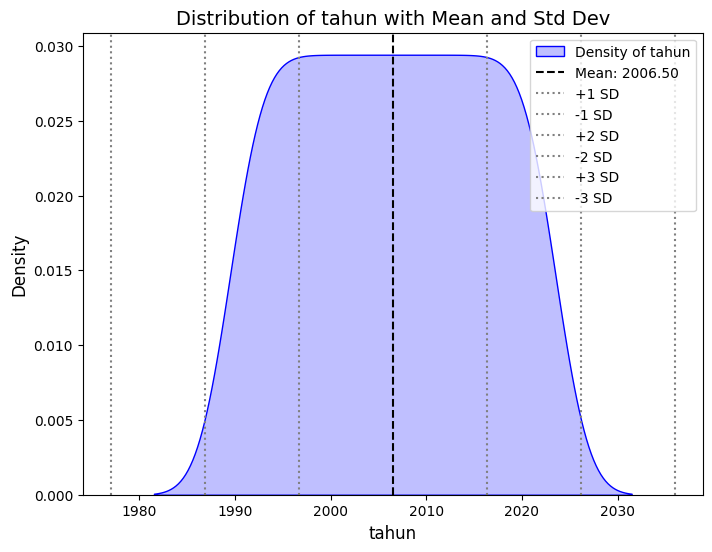

<ipython-input-17-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


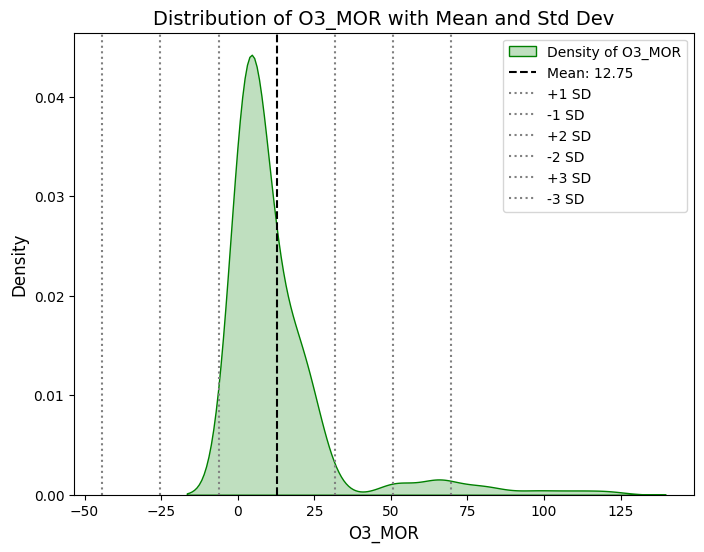

<ipython-input-17-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


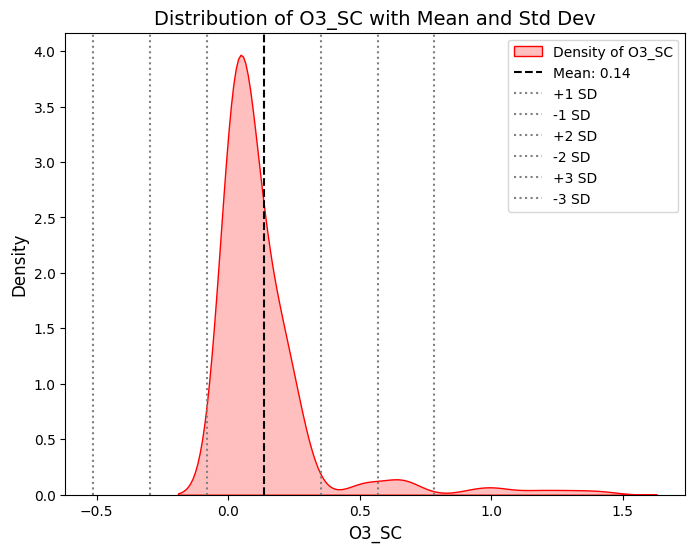

<ipython-input-17-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


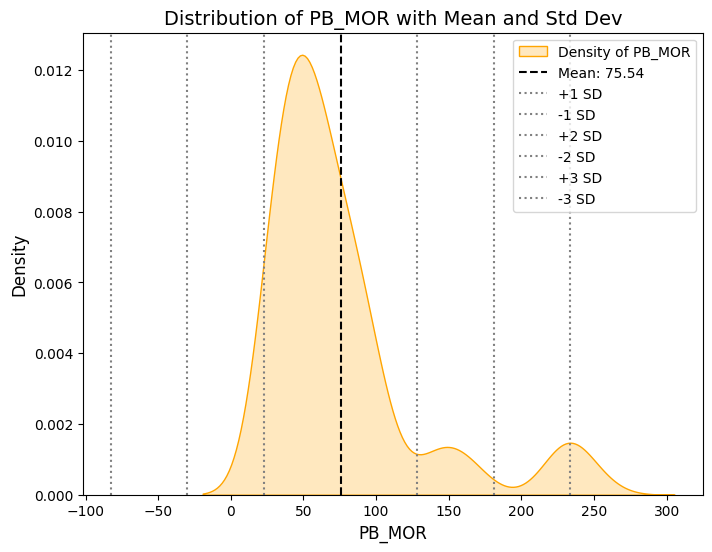

<ipython-input-17-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


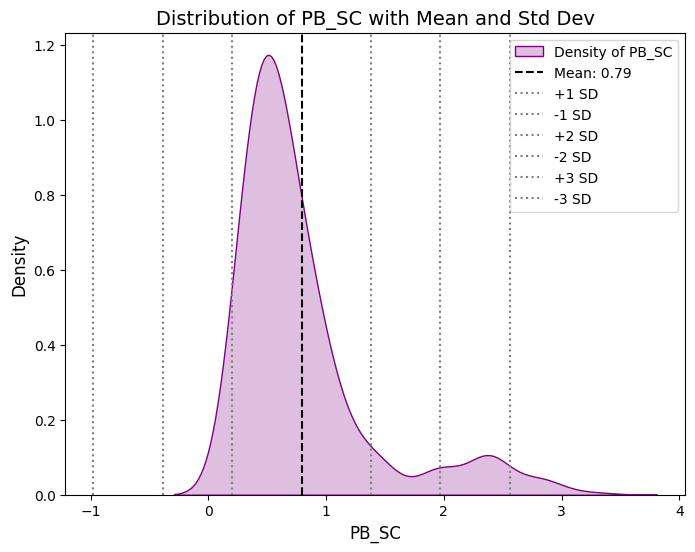

<ipython-input-17-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


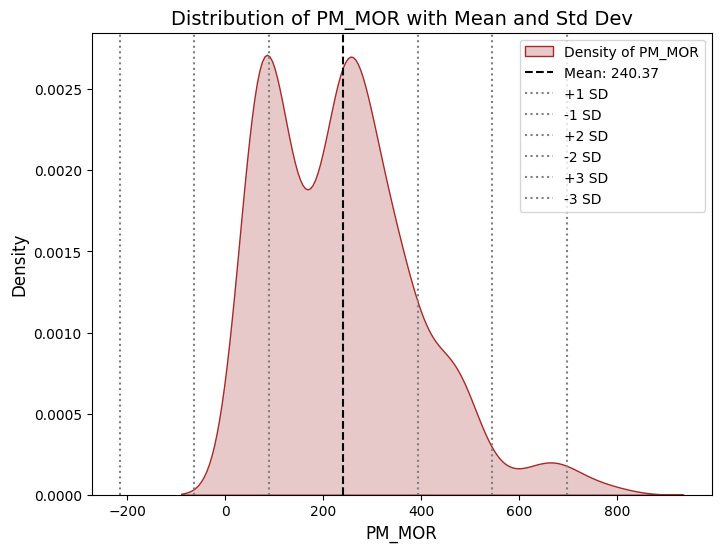

<ipython-input-17-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


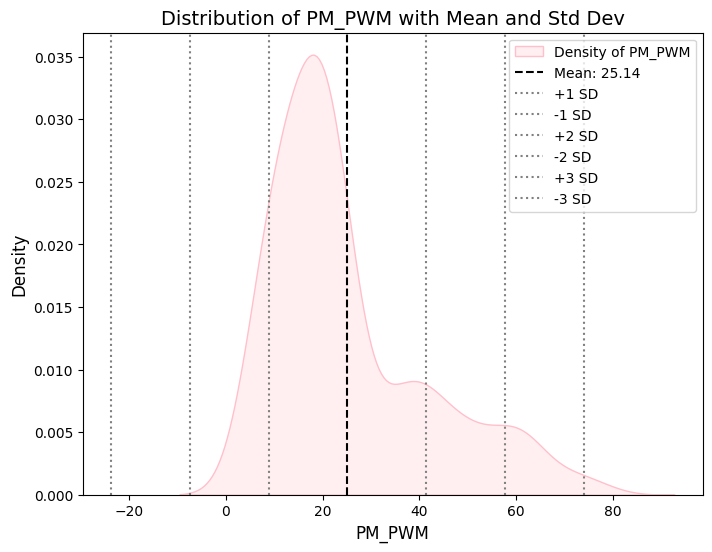

<ipython-input-17-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


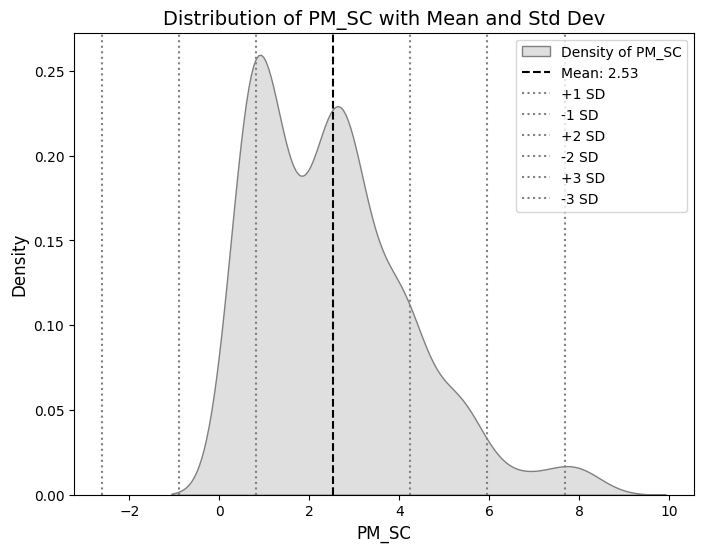

<ipython-input-17-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


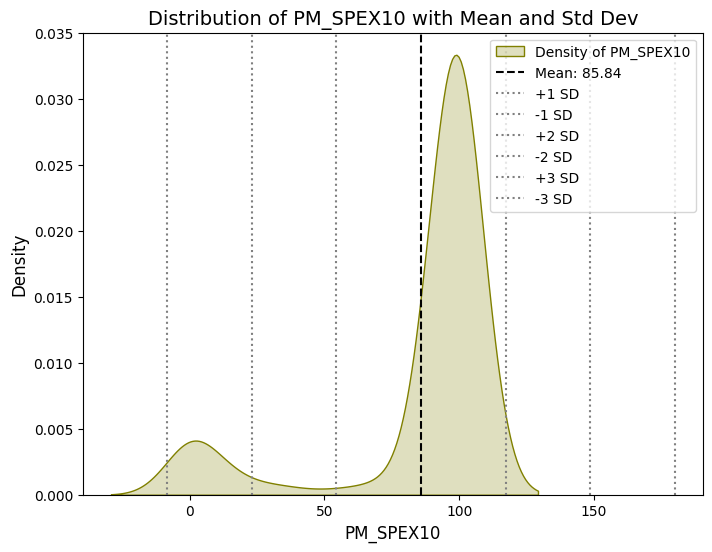

<ipython-input-17-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


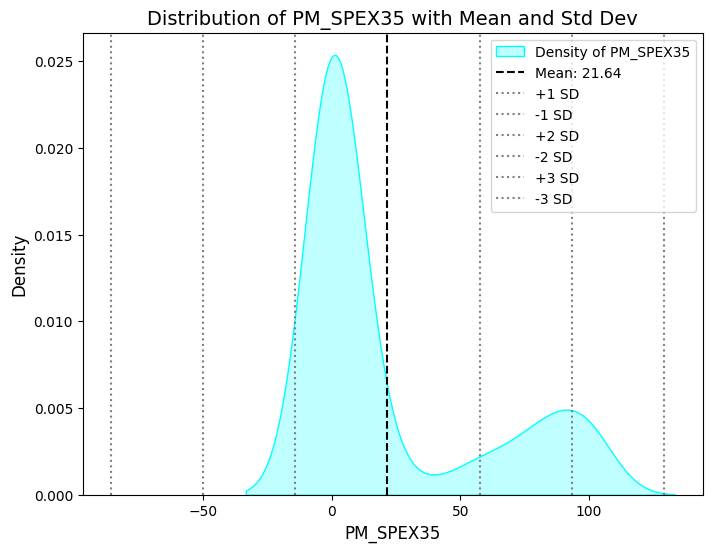

<ipython-input-17-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


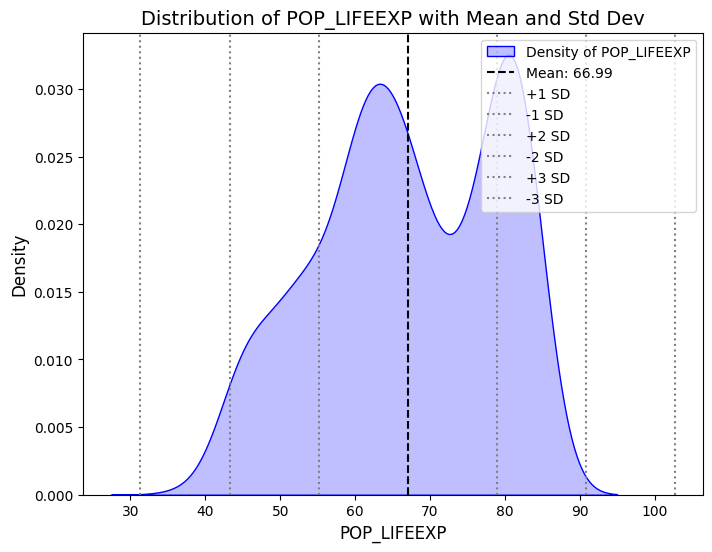

<ipython-input-17-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


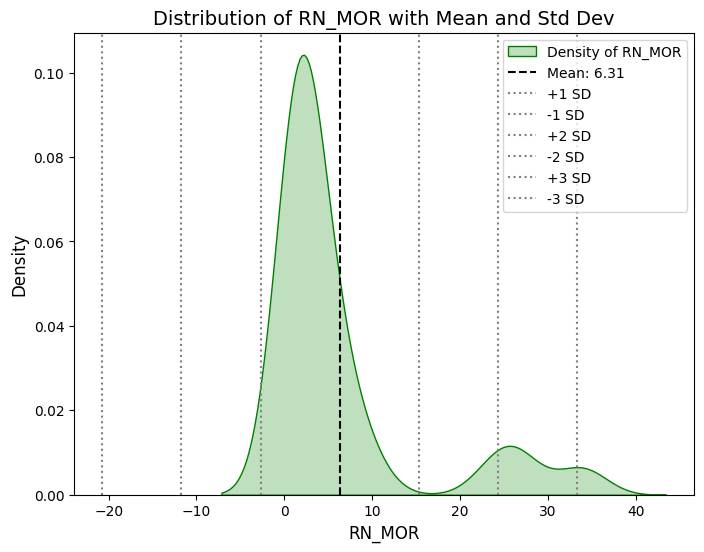

<ipython-input-17-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


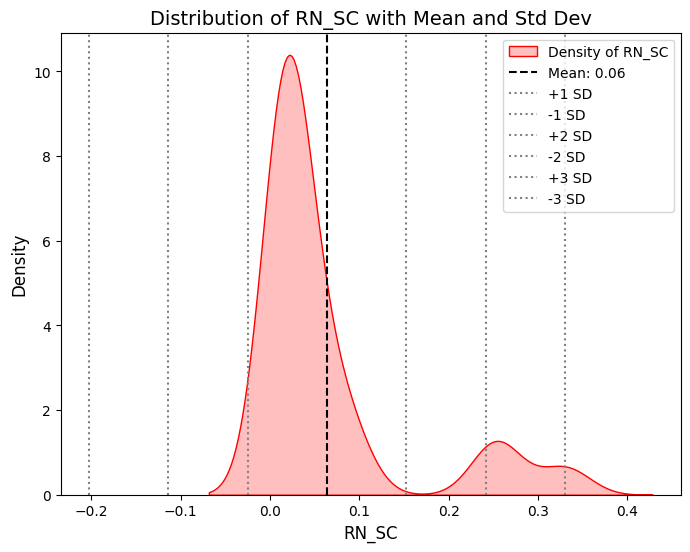

In [ ]:
def plot_density_with_components(data, feature_name, color):
    plt.figure(figsize=(8, 6))

    # Plot KDE (Density Curve)
    sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')

    # Hitung rata-rata dan standar deviasi
    mean_value = data[feature_name].mean()
    std_value = data[feature_name].std()

    # Tambahkan garis rata-rata (mean line)
    plt.axvline(mean_value, color='black', linestyle='--', label=f'Mean: {mean_value:.2f}')

    # Tambahkan garis untuk ±1, ±2, dan ±3 standar deviasi
    for i in range(1, 4):
        plt.axvline(mean_value + i * std_value, color='gray', linestyle=':', label=f'+{i} SD')
        plt.axvline(mean_value - i * std_value, color='gray', linestyle=':', label=f'-{i} SD')

    # Tambahkan label, judul, dan legend
    plt.title(f'Distribution of {feature_name} with Mean and Std Dev', fontsize=14)
    plt.xlabel(feature_name, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(loc='upper right', fontsize=10)

    # Tampilkan plot
    plt.show()


numeric_columns = df.select_dtypes(include=np.number).columns


colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Iterasi melalui kolom numerik dan panggil fungsi plot
for i, column in enumerate(numeric_columns):
    plot_density_with_components(df, column, colors[i % len(colors)])

#### Mendeskripsikan boxplot

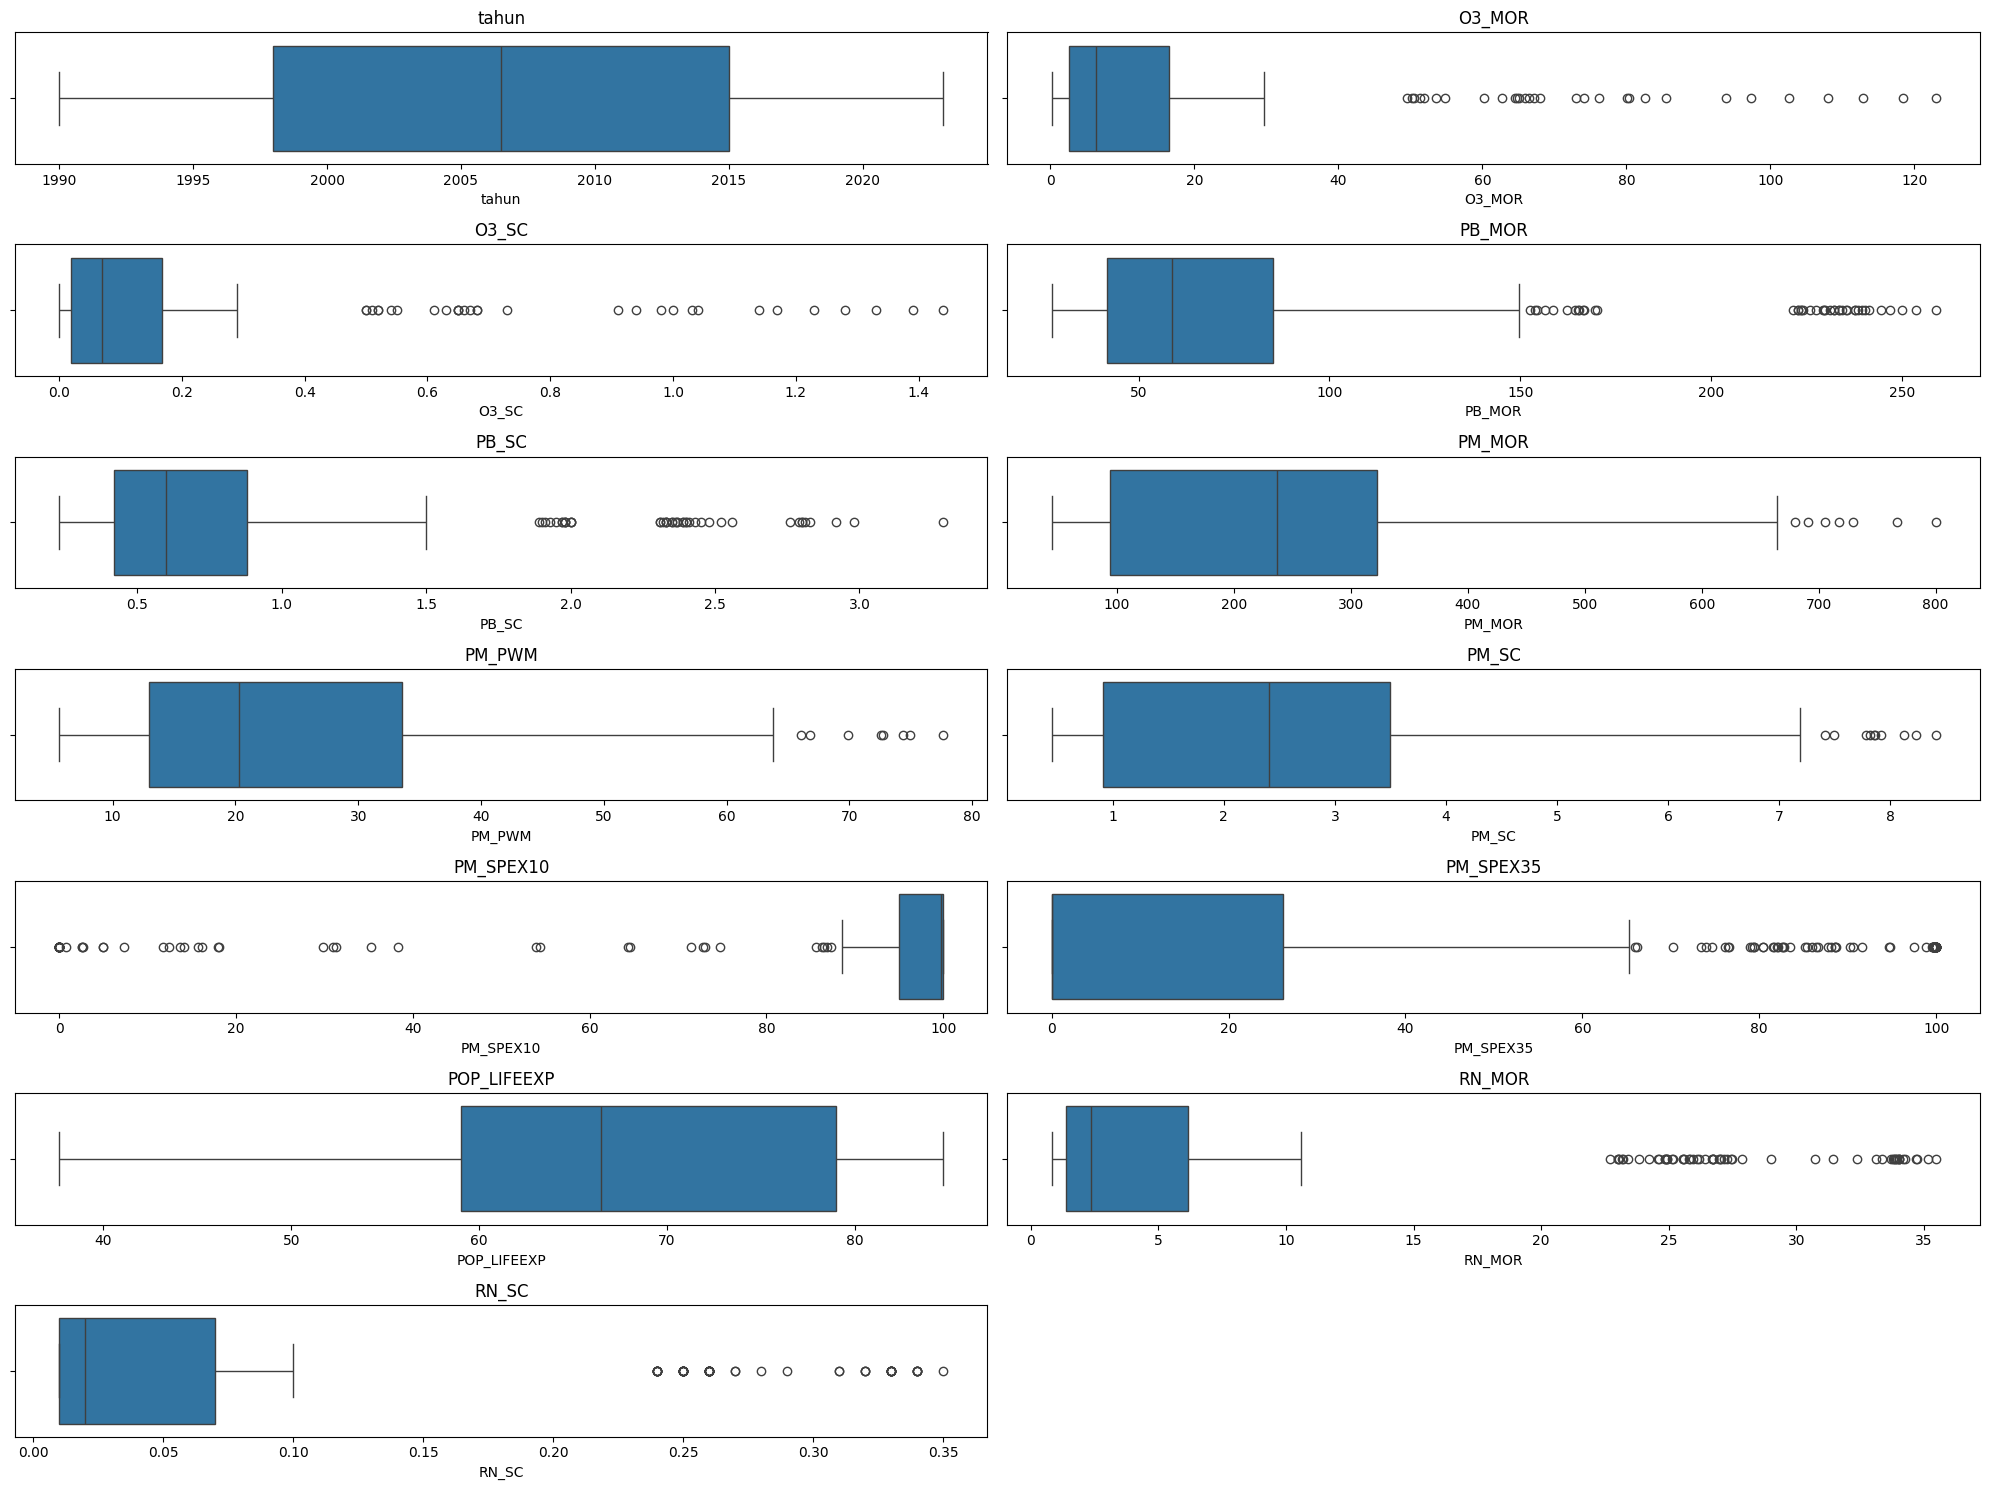

In [ ]:

numeric_columns = df.select_dtypes(include=np.number).columns


plt.figure(figsize=(20, 15))  # Ukuran figure yang lebih besar untuk memuat semua plot
num_columns = len(numeric_columns)

for i, column in enumerate(numeric_columns, 1):
    plt.subplot((num_columns + 1) // 2, 2, i)  # Menentukan posisi subplot
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel(column)

plt.tight_layout()  # Menyusun layout agar tidak tumpang tindih
plt.show()

### Missing value handling

cheking missing value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tahun            510 non-null    int64  
 1   kategori_negara  510 non-null    object 
 2   negara           510 non-null    object 
 3   O3_MOR           450 non-null    float64
 4   O3_SC            450 non-null    float64
 5   PB_MOR           450 non-null    float64
 6   PB_SC            450 non-null    float64
 7   PM_MOR           450 non-null    float64
 8   PM_PWM           345 non-null    float64
 9   PM_SC            450 non-null    float64
 10  PM_SPEX10        345 non-null    float64
 11  PM_SPEX35        345 non-null    float64
 12  POP_LIFEEXP      510 non-null    float64
 13  RN_MOR           450 non-null    float64
 14  RN_SC            450 non-null    float64
dtypes: float64(12), int64(1), object(2)
memory usage: 59.9+ KB


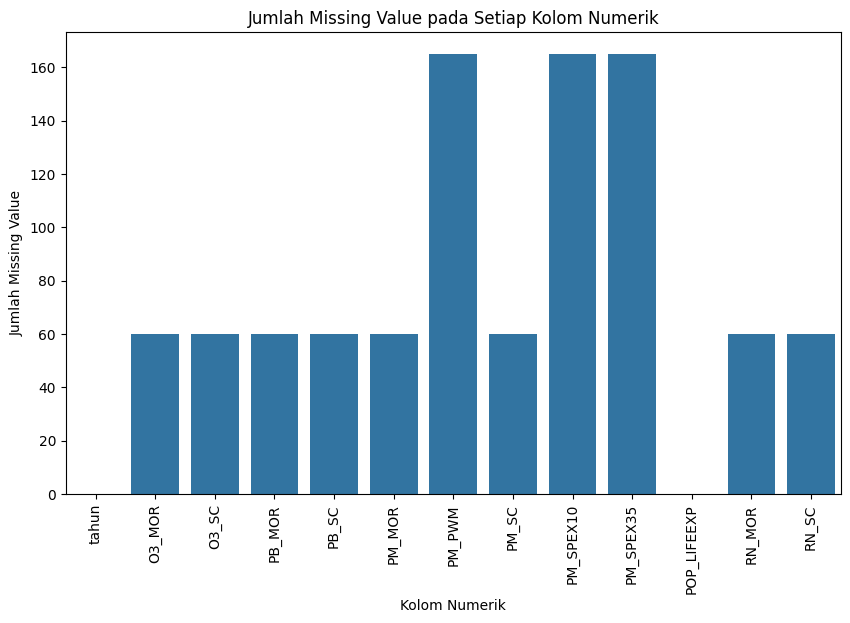

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah missing value pada setiap kolom numerik
missing_values = df.select_dtypes(include=np.number).isnull().sum()

# Membuat bar plot dari jumlah missing value
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)  # Rotasi label sumbu x agar mudah dibaca
plt.xlabel("Kolom Numerik")
plt.ylabel("Jumlah Missing Value")
plt.title("Jumlah Missing Value pada Setiap Kolom Numerik")
plt.show()

mengisi missing value :
dengan lower/ upper boundaries berdasarkan *std*

In [ ]:

from scipy.stats import trim_mean
data  = df.select_dtypes(include=np.number).columns

for column in data:
    mean = df[column].mean()
    std = df[column].std()

    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std

    # Menghapus outlier berdasarkan batas atas dan bawah
    df_trimmed = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Menghitung trimmed mean
    trimmed_mean = trim_mean(df_trimmed[column], proportiontocut=0.1)  # Misalnya, memotong 10% data dari setiap ujung

    # Mengisi nilai yang hilang dengan trimmed mean
    df[column].fillna(trimmed_mean, inplace=True)

<ipython-input-21-ac753559cf9f>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(trimmed_mean, inplace=True)


### Handling outlier

cek outlier

In [ ]:
def handle_outlier(data):
  sorted_data = np.sort(data)
  Q1,Q3 = np.percentile(sorted_data,[25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

columns_to_check = df.select_dtypes(include=np.number).columns
for column in columns_to_check:
    lowerbound, upperbound = handle_outlier(df[column])
    print(f"\nKolom: {column}")
    print("Lowerbound (Q1): {0}\nUpperbound (Q3): {1}".format(lowerbound, upperbound))
    print("Outlier data in dataset: {} rows.\n".format(len(df[(df[column] < lowerbound) | (df[column] > upperbound)])))



Kolom: tahun
Lowerbound (Q1): 1972.5
Upperbound (Q3): 2040.5
Outlier data in dataset: 0 rows.


Kolom: O3_MOR
Lowerbound (Q1): -13.653750000000002
Upperbound (Q3): 30.25625
Outlier data in dataset: 30 rows.


Kolom: O3_SC
Lowerbound (Q1): -0.13500000000000004
Upperbound (Q3): 0.30500000000000005
Outlier data in dataset: 30 rows.


Kolom: PB_MOR
Lowerbound (Q1): -13.579999999999991
Upperbound (Q3): 141.01999999999998
Outlier data in dataset: 52 rows.


Kolom: PB_SC
Lowerbound (Q1): -0.13499999999999995
Upperbound (Q3): 1.4249999999999998
Outlier data in dataset: 52 rows.


Kolom: PM_MOR
Lowerbound (Q1): -151.9749999999999
Upperbound (Q3): 583.405
Outlier data in dataset: 15 rows.


Kolom: PM_PWM
Lowerbound (Q1): 9.017499999999998
Upperbound (Q3): 31.8575
Outlier data in dataset: 131 rows.


Kolom: PM_SC
Lowerbound (Q1): -1.67
Upperbound (Q3): 6.07
Outlier data in dataset: 16 rows.


Kolom: PM_SPEX10
Lowerbound (Q1): 97.22625
Upperbound (Q3): 101.53625
Outlier data in dataset: 103 rows.

mengganti nilai outlier dengan boundaries yang sudah ditentukan

In [ ]:
data = df.select_dtypes(include=np.number).columns
for column in data:
  lowerbound, upperbound = handle_outlier(df[column])

  df[column] = np.where(df[column] < lowerbound, lowerbound, df[column])
  df[column] = np.where(df[column] > upperbound, upperbound, df[column])

### Data profilling setelah data cleaning

#### distribus data

<ipython-input-24-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


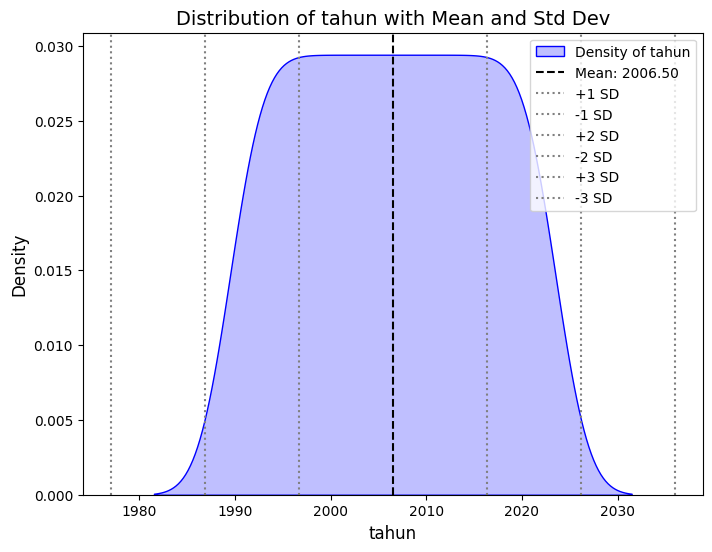

<ipython-input-24-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


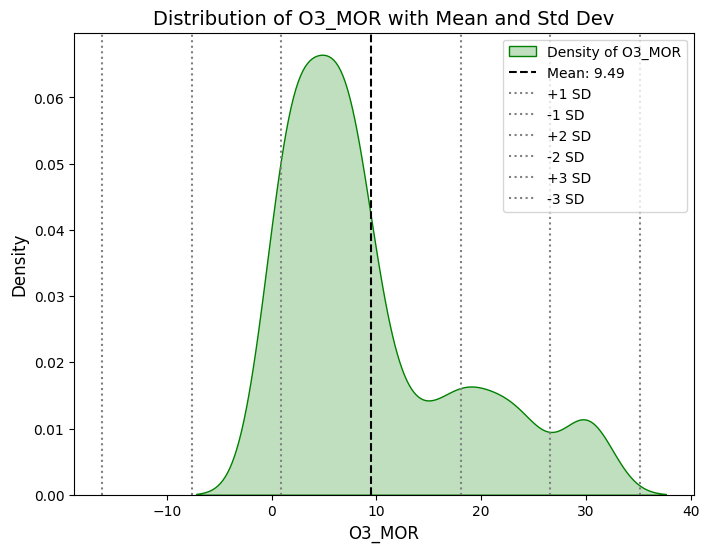

<ipython-input-24-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


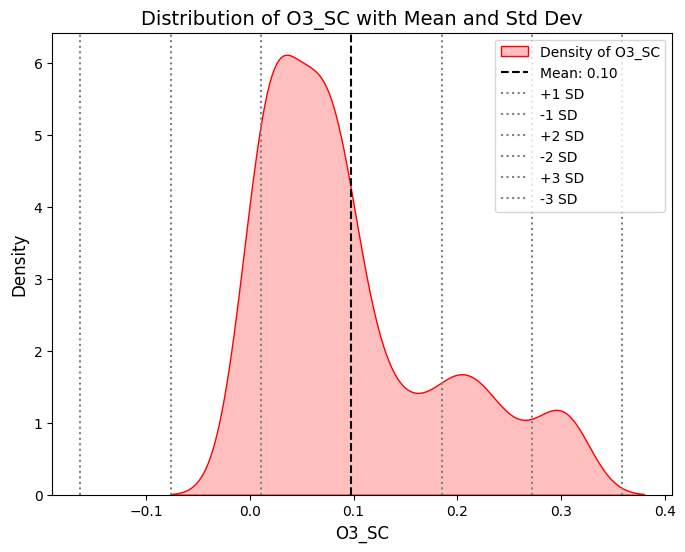

<ipython-input-24-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


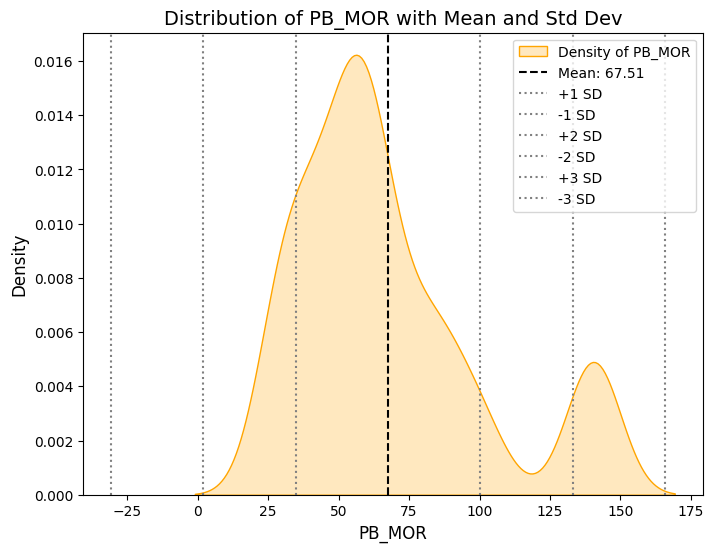

<ipython-input-24-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


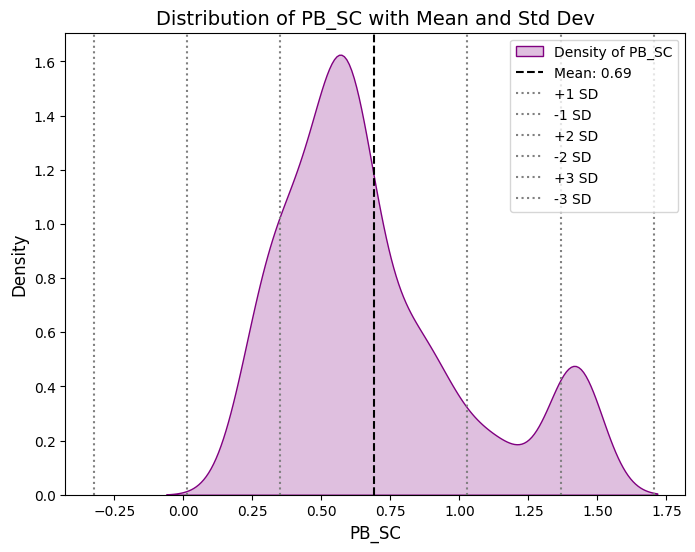

<ipython-input-24-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


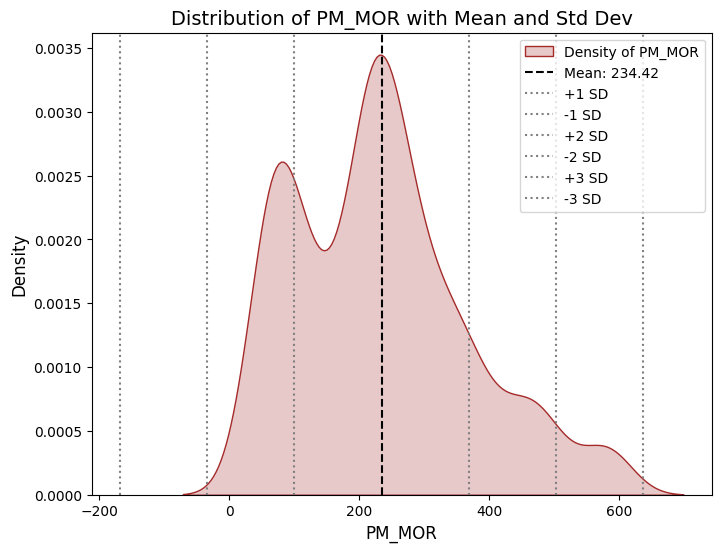

<ipython-input-24-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


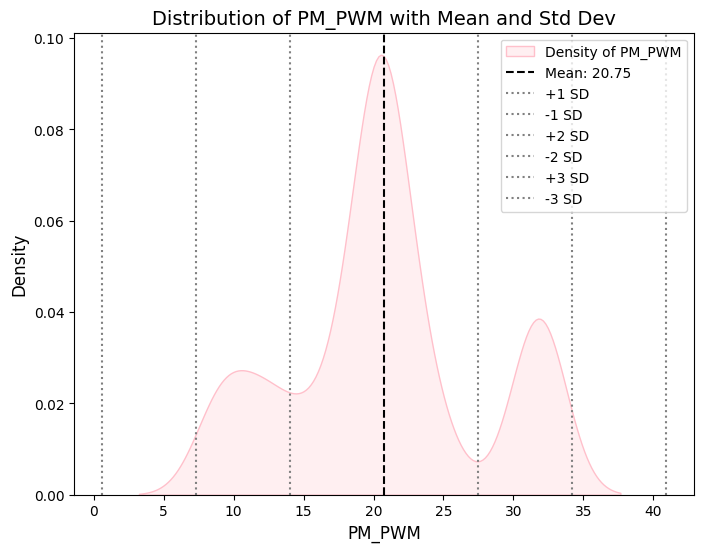

<ipython-input-24-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


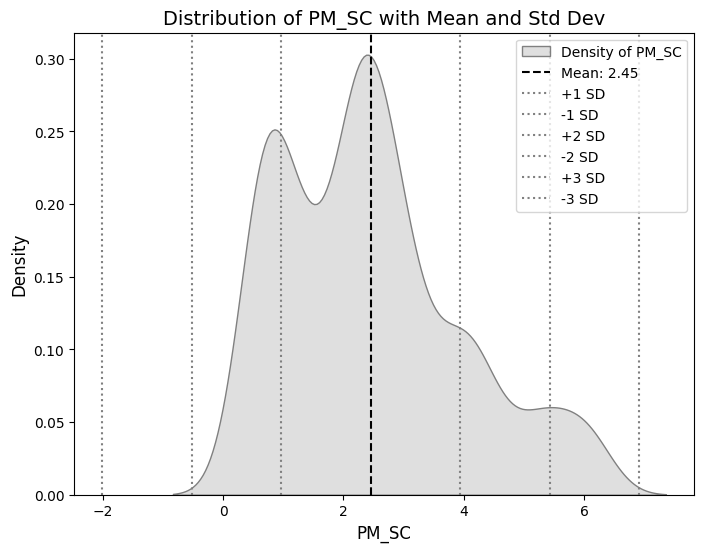

<ipython-input-24-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


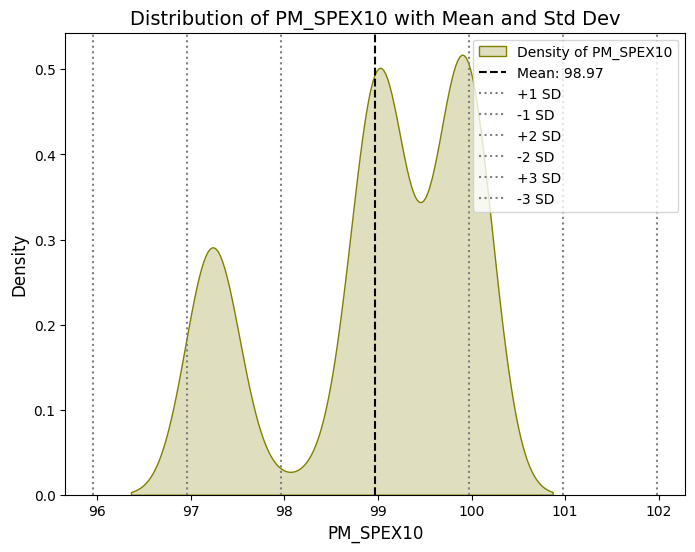

<ipython-input-24-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


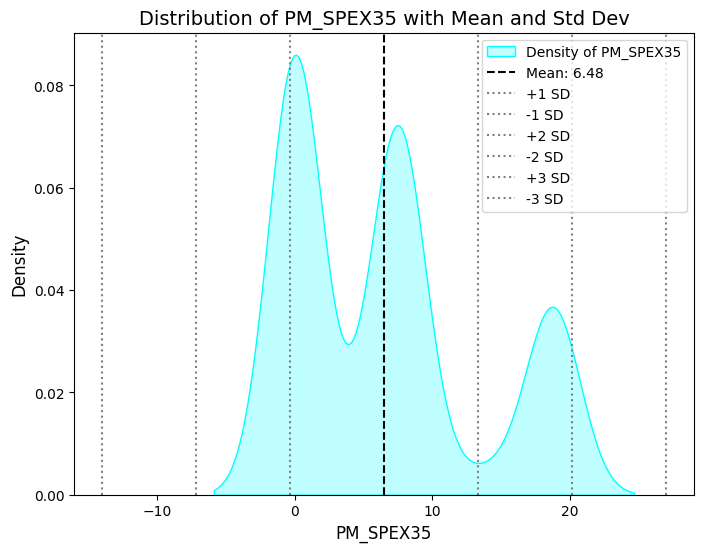

<ipython-input-24-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


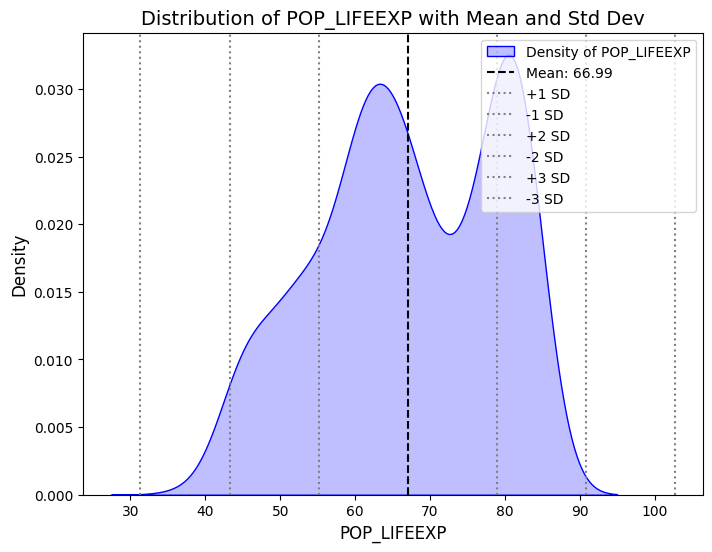

<ipython-input-24-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


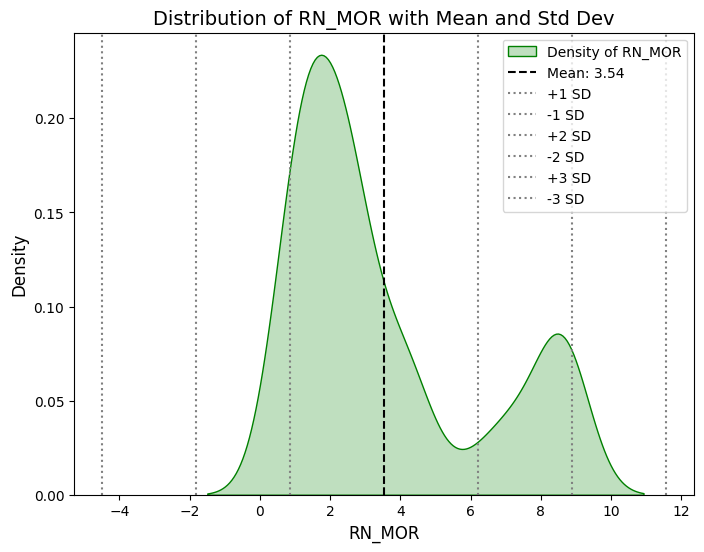

<ipython-input-24-8accb2870dfc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')


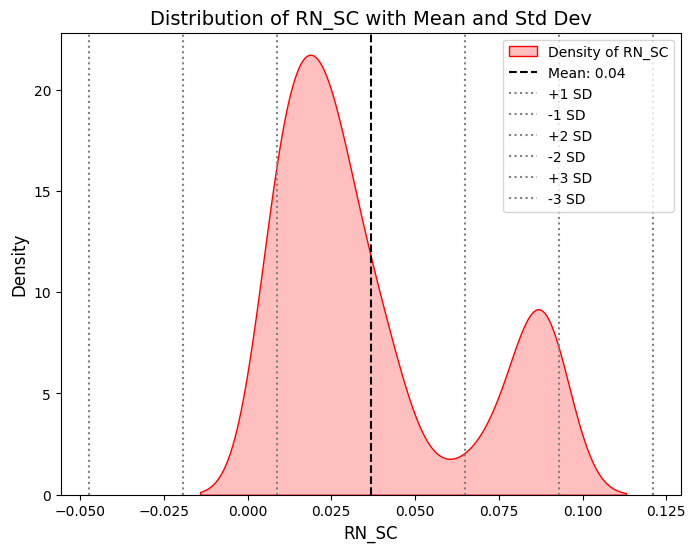

In [ ]:
def plot_density_with_components(data, feature_name, color):
    plt.figure(figsize=(8, 6))

    # Plot KDE (Density Curve)
    sns.kdeplot(data[feature_name], color=color, shade=True, label=f'Density of {feature_name}')

    # Hitung rata-rata dan standar deviasi
    mean_value = data[feature_name].mean()
    std_value = data[feature_name].std()

    # Tambahkan garis rata-rata (mean line)
    plt.axvline(mean_value, color='black', linestyle='--', label=f'Mean: {mean_value:.2f}')

    # Tambahkan garis untuk ±1, ±2, dan ±3 standar deviasi
    for i in range(1, 4):
        plt.axvline(mean_value + i * std_value, color='gray', linestyle=':', label=f'+{i} SD')
        plt.axvline(mean_value - i * std_value, color='gray', linestyle=':', label=f'-{i} SD')

    # Tambahkan label, judul, dan legend
    plt.title(f'Distribution of {feature_name} with Mean and Std Dev', fontsize=14)
    plt.xlabel(feature_name, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(loc='upper right', fontsize=10)

    # Tampilkan plot
    plt.show()


numeric_columns = df.select_dtypes(include=np.number).columns


colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Iterasi melalui kolom numerik dan panggil fungsi plot
for i, column in enumerate(numeric_columns):
    plot_density_with_components(df, column, colors[i % len(colors)])

#### Boxplot

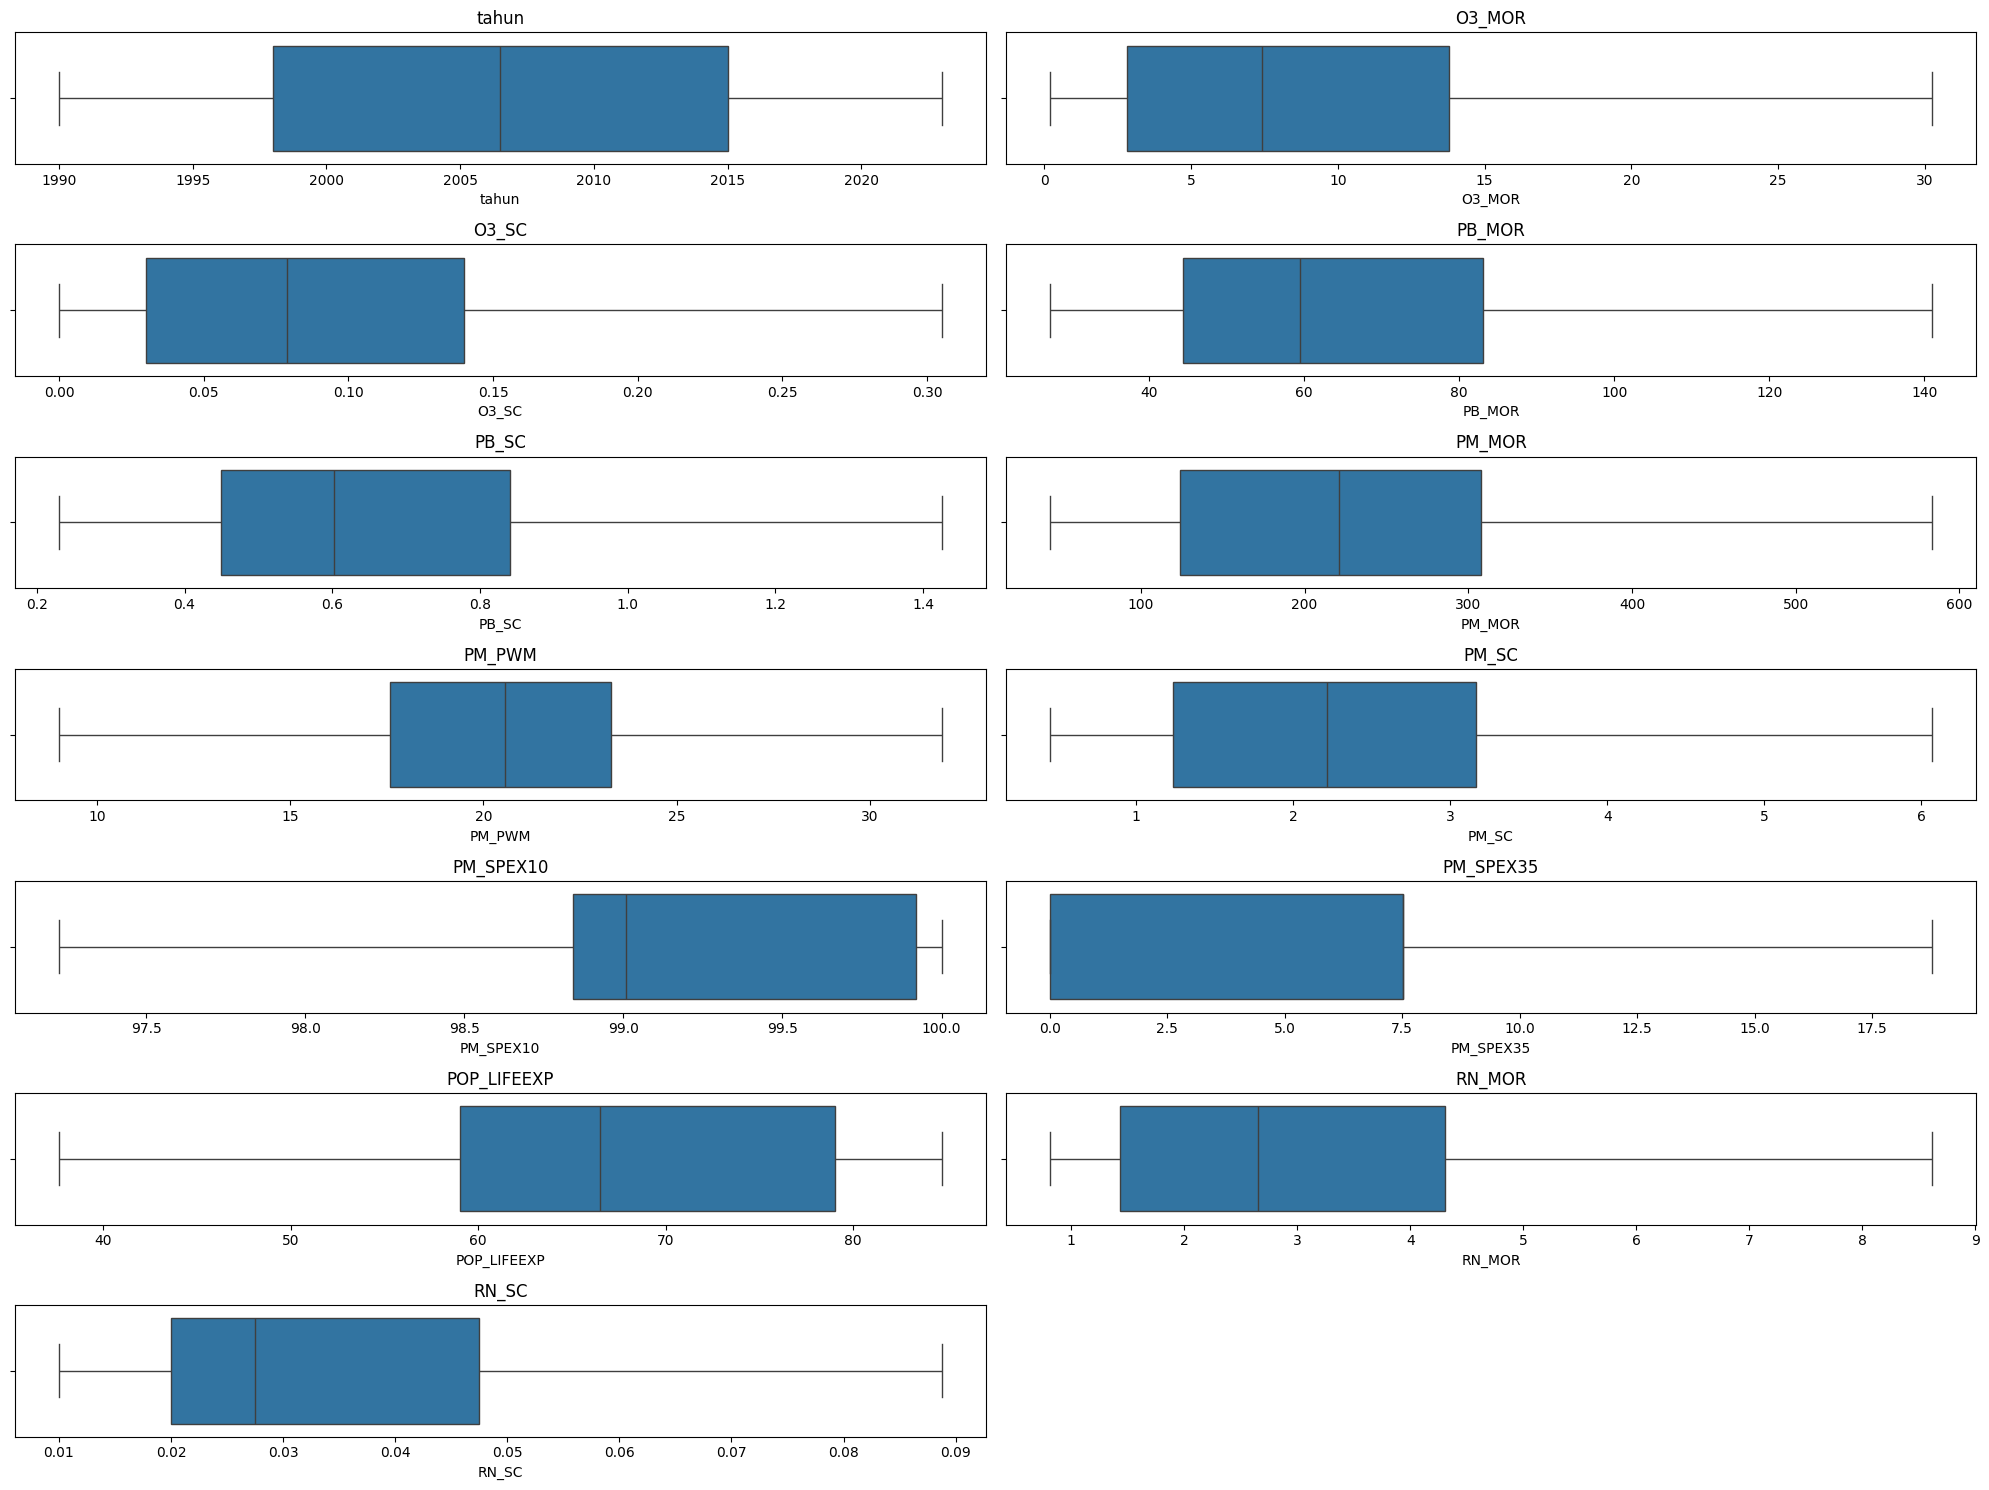

In [ ]:

numeric_columns = df.select_dtypes(include=np.number).columns


plt.figure(figsize=(20, 15))  # Ukuran figure yang lebih besar untuk memuat semua plot
num_columns = len(numeric_columns)

for i, column in enumerate(numeric_columns, 1):
    plt.subplot((num_columns + 1) // 2, 2, i)  # Menentukan posisi subplot
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel(column)

plt.tight_layout()  # Menyusun layout agar tidak tumpang tindih
plt.show()

### Imbalance data

#### cek proporsi data

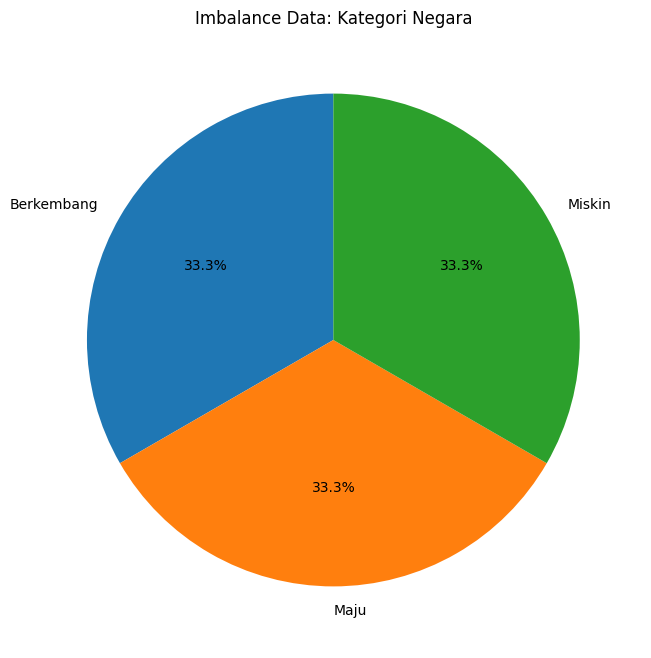

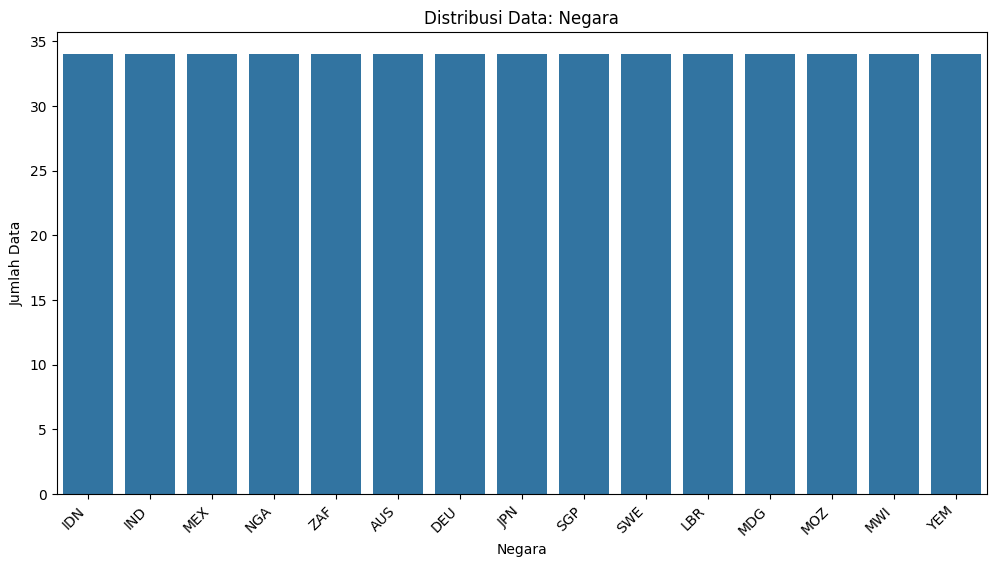

In [ ]:
# prompt: buatkan pengecekan imbalance data pada colom kategori negara dengan pie chart, dan bar plot untuk negara

# Pie chart for kategori_negara imbalance
kategori_counts = df['kategori_negara'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(kategori_counts, labels=kategori_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Imbalance Data: Kategori Negara')
plt.show()

# Bar plot for negara distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='negara', data=df)
plt.title('Distribusi Data: Negara')
plt.xlabel('Negara')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.show()

#### imbalance handling (SMOTE)

In [ ]:
df['kategori_negara'].value_counts()


kategori_negara
Berkembang    170
Maju          170
Miskin        170
Name: count, dtype: int64

In [ ]:
df1 = df.drop(columns='negara')
kategori_negaara = {
    'Miskin':0,
    'Berkembang':1,
    'Maju':2
}

df1['kategori_negara'] = df1['kategori_negara'].map(kategori_negaara)

kategori_negara
1    170
2    170
0    170
Name: count, dtype: int64


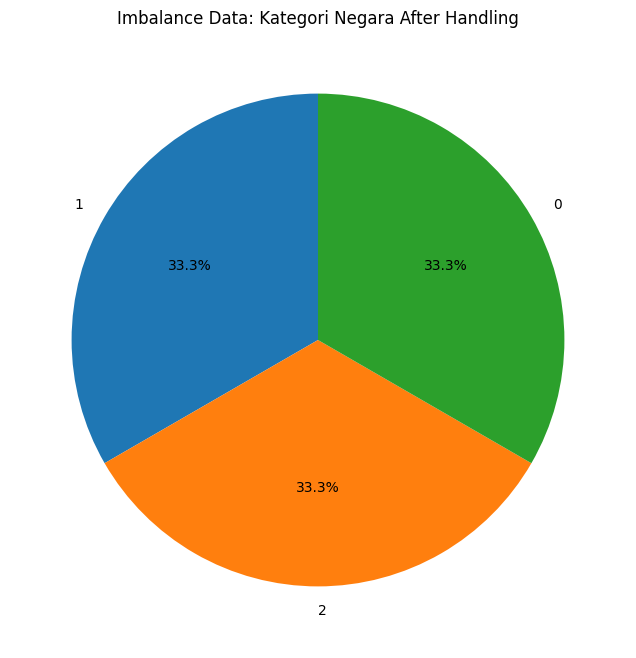

In [ ]:
# prompt: lakukan penanganan data imbalance pada kolom kategori negara pada df1

from imblearn.over_sampling import SMOTE

# Pisahkan fitur dan target
X = df1.drop('kategori_negara', axis=1)
y = df1['kategori_negara']

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Lakukan oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Buat DataFrame baru dengan data yang telah di-resample
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Periksa distribusi kelas setelah oversampling
print(df_resampled['kategori_negara'].value_counts())

# Pie chart for kategori_negara after imbalance handling
kategori_counts = df_resampled['kategori_negara'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(kategori_counts, labels=kategori_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Imbalance Data: Kategori Negara After Handling')
plt.show()

### Ecoding feature

In [ ]:
df.head()

column_name   tahun kategori_negara negara    O3_MOR  O3_SC  PB_MOR  PB_SC  \
0            1990.0      Berkembang    IDN   2.22000  0.020   74.49   0.75   
1            1990.0      Berkembang    IND  30.25625  0.305  131.74   1.32   
2            1990.0      Berkembang    MEX  23.75000  0.270   55.55   0.62   
3            1990.0      Berkembang    NGA   7.79000  0.080   40.65   0.41   
4            1990.0      Berkembang    ZAF   4.64000  0.050   29.87   0.34   

column_name  PM_MOR   PM_PWM  PM_SC  PM_SPEX10  PM_SPEX35  POP_LIFEEXP  \
0            212.71  26.8600   2.14      99.61  18.776779        63.25   
1            320.01  31.8575   3.22      99.90  18.776779        58.62   
2            252.53  30.9500   2.82      99.95  18.776779        69.03   
3            234.54  31.8575   2.36      99.95  18.776779        45.73   
4            338.67  23.7000   3.85      99.74  12.790000        62.94   

column_name  RN_MOR  RN_SC  
0              1.82   0.02  
1              1.55   0.02  
2              3.92   0.04  
3              1.33   0.01  
4              5.89   0.07

In [ ]:
df.set_index('tahun',inplace=True)

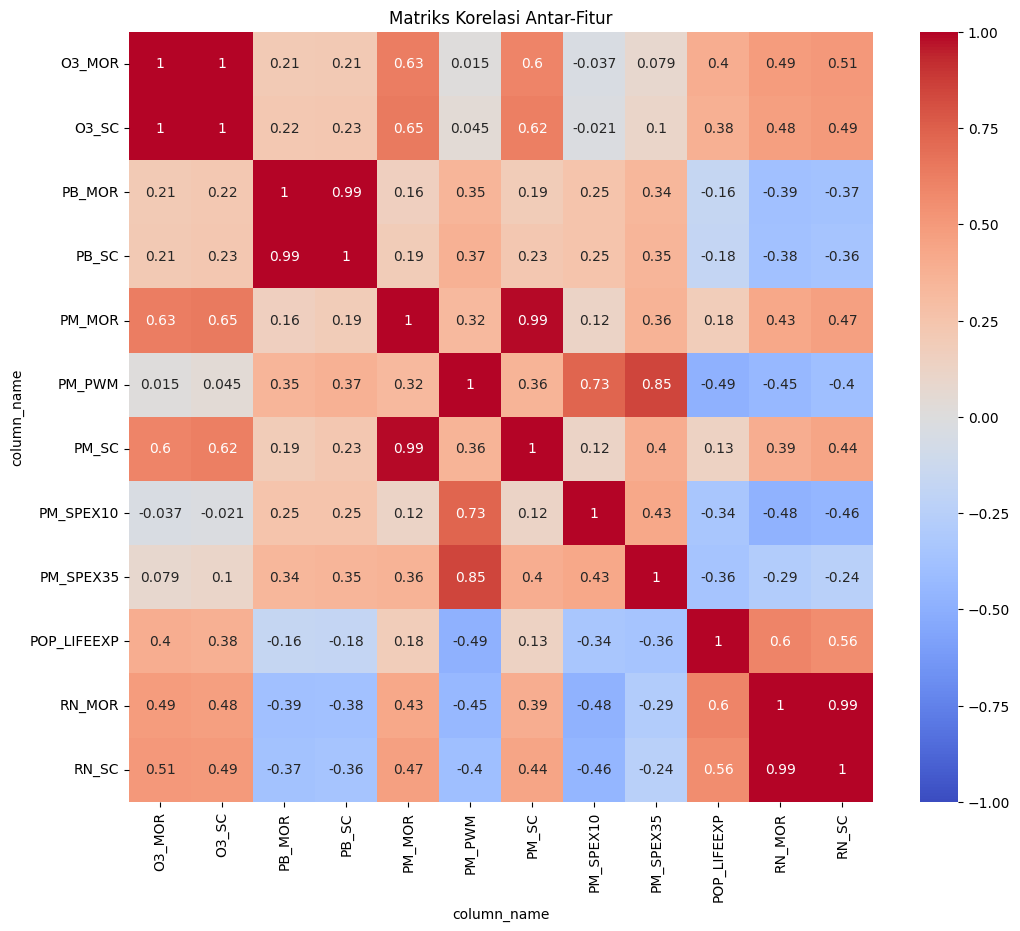


Pasangan fitur dengan korelasi tinggi (|r| > 0.7):
O3_SC - O3_MOR: 0.9961
PB_SC - PB_MOR: 0.9939
PM_SC - PM_MOR: 0.9893
PM_SPEX10 - PM_PWM: 0.7302
PM_SPEX35 - PM_PWM: 0.8495
RN_SC - RN_MOR: 0.9931


<Figure size 1200x1000 with 0 Axes>

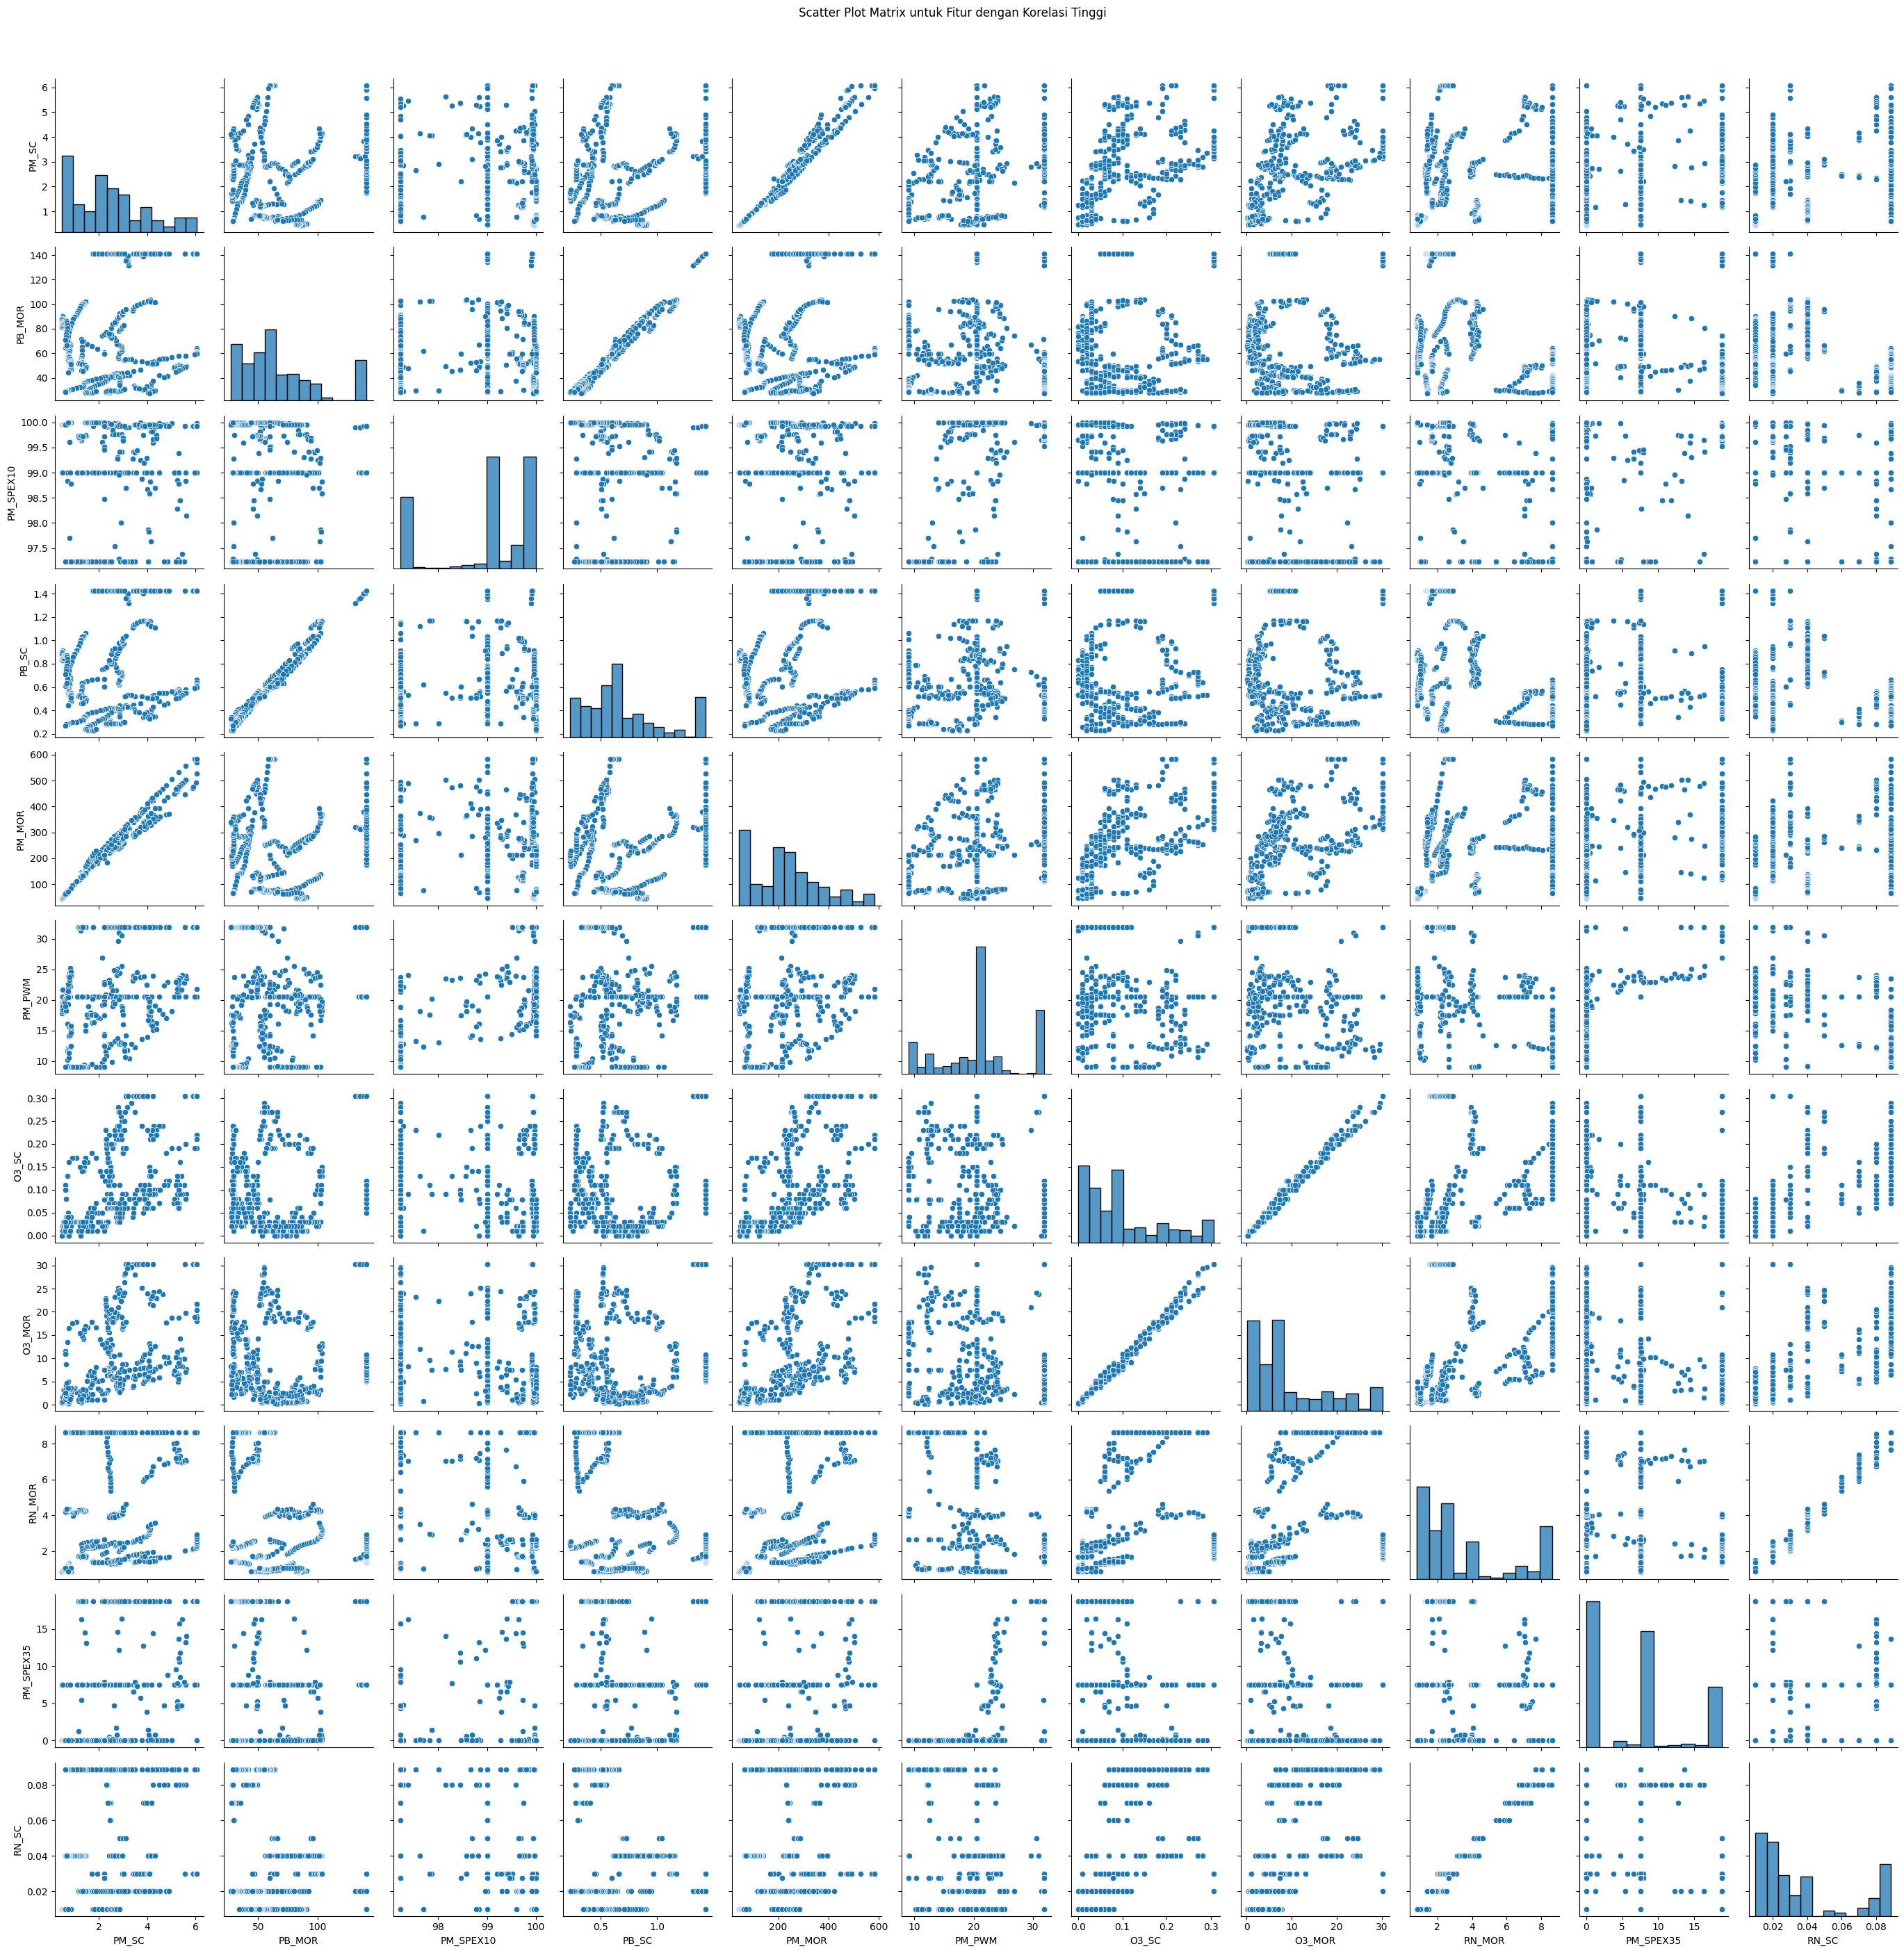

In [ ]:
def analyze_correlation(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    corr_matrix = df[numeric_columns].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title("Matriks Korelasi Antar-Fitur")
    plt.show()

    print("\nPasangan fitur dengan korelasi tinggi (|r| > 0.7):")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.4f}")

    # Scatter plot matrix untuk fitur-fitur dengan korelasi tinggi
    high_corr_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr_features.add(corr_matrix.columns[i])
                high_corr_features.add(corr_matrix.columns[j])

    if high_corr_features:
        plt.figure(figsize=(12, 10))
        sns.pairplot(df[list(high_corr_features)])
        plt.suptitle("Scatter Plot Matrix untuk Fitur dengan Korelasi Tinggi", y=1.02)
        plt.tight_layout()
        plt.show()

# Jalankan fungsi
analyze_correlation(df)

Drop feature dengan korelasi tinggi, dan colom negara

In [ ]:
fiture_drop = ['PM_PWM','PM_SC','O3_SC','PB_SC','RN_SC', 'negara']
df.drop(columns=fiture_drop,inplace=True)

In [ ]:
df.head()

column_name kategori_negara    O3_MOR  PB_MOR  PM_MOR  PM_SPEX10  PM_SPEX35  \
tahun                                                                         
1990.0           Berkembang   2.22000   74.49  212.71      99.61  18.776779   
1990.0           Berkembang  30.25625  131.74  320.01      99.90  18.776779   
1990.0           Berkembang  23.75000   55.55  252.53      99.95  18.776779   
1990.0           Berkembang   7.79000   40.65  234.54      99.95  18.776779   
1990.0           Berkembang   4.64000   29.87  338.67      99.74  12.790000   

column_name  POP_LIFEEXP  RN_MOR  
tahun                             
1990.0             63.25    1.82  
1990.0             58.62    1.55  
1990.0             69.03    3.92  
1990.0             45.73    1.33  
1990.0             62.94    5.89

HeatMap correlation setelah Drop feature

<Axes: xlabel='column_name', ylabel='column_name'>

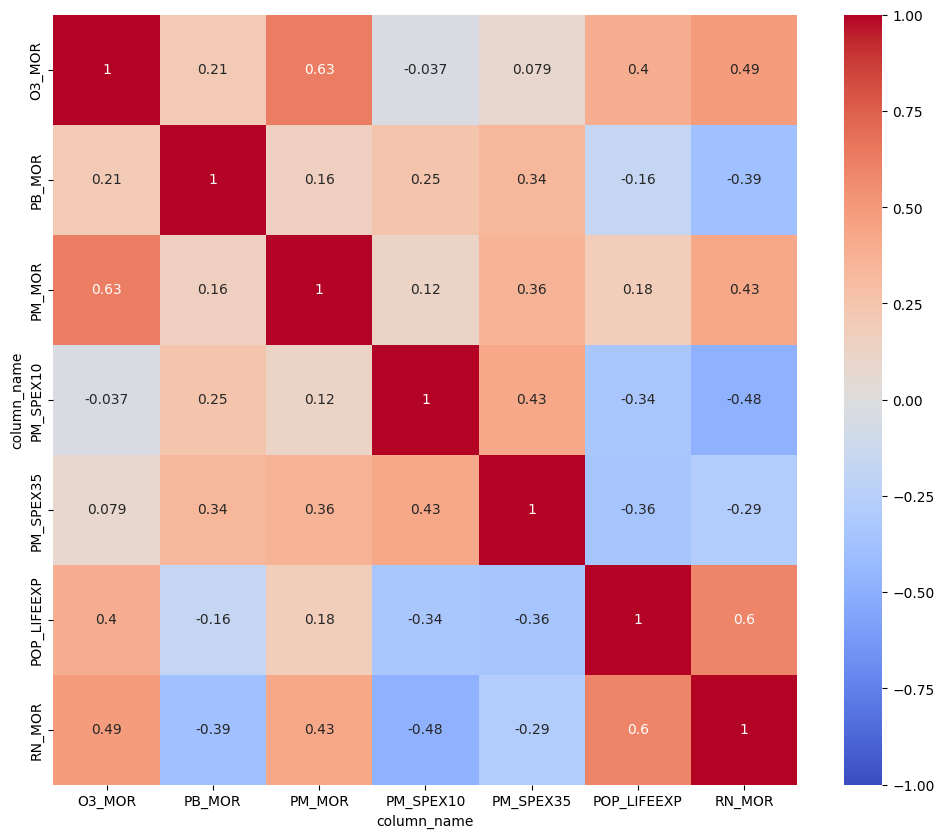

In [ ]:
corr_feature = df.select_dtypes(include=[np.number]).columns

corr_matrix = df[corr_feature].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

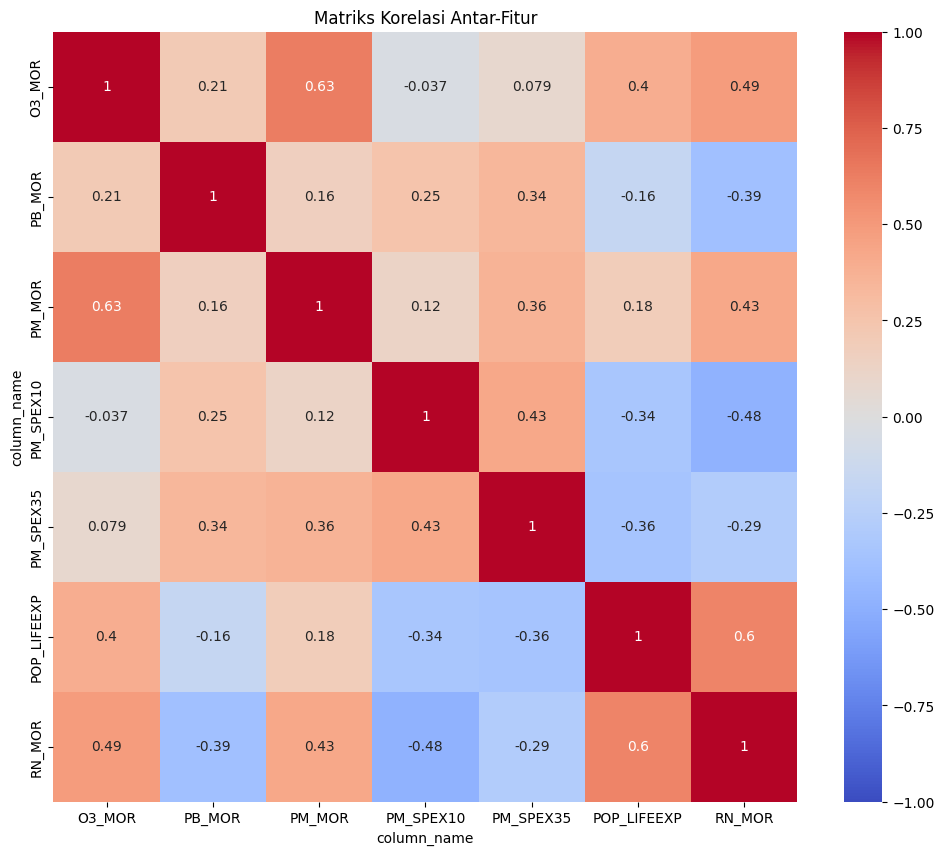


Pasangan fitur dengan korelasi tinggi (|r| > 0.7):


<Figure size 1200x1000 with 0 Axes>

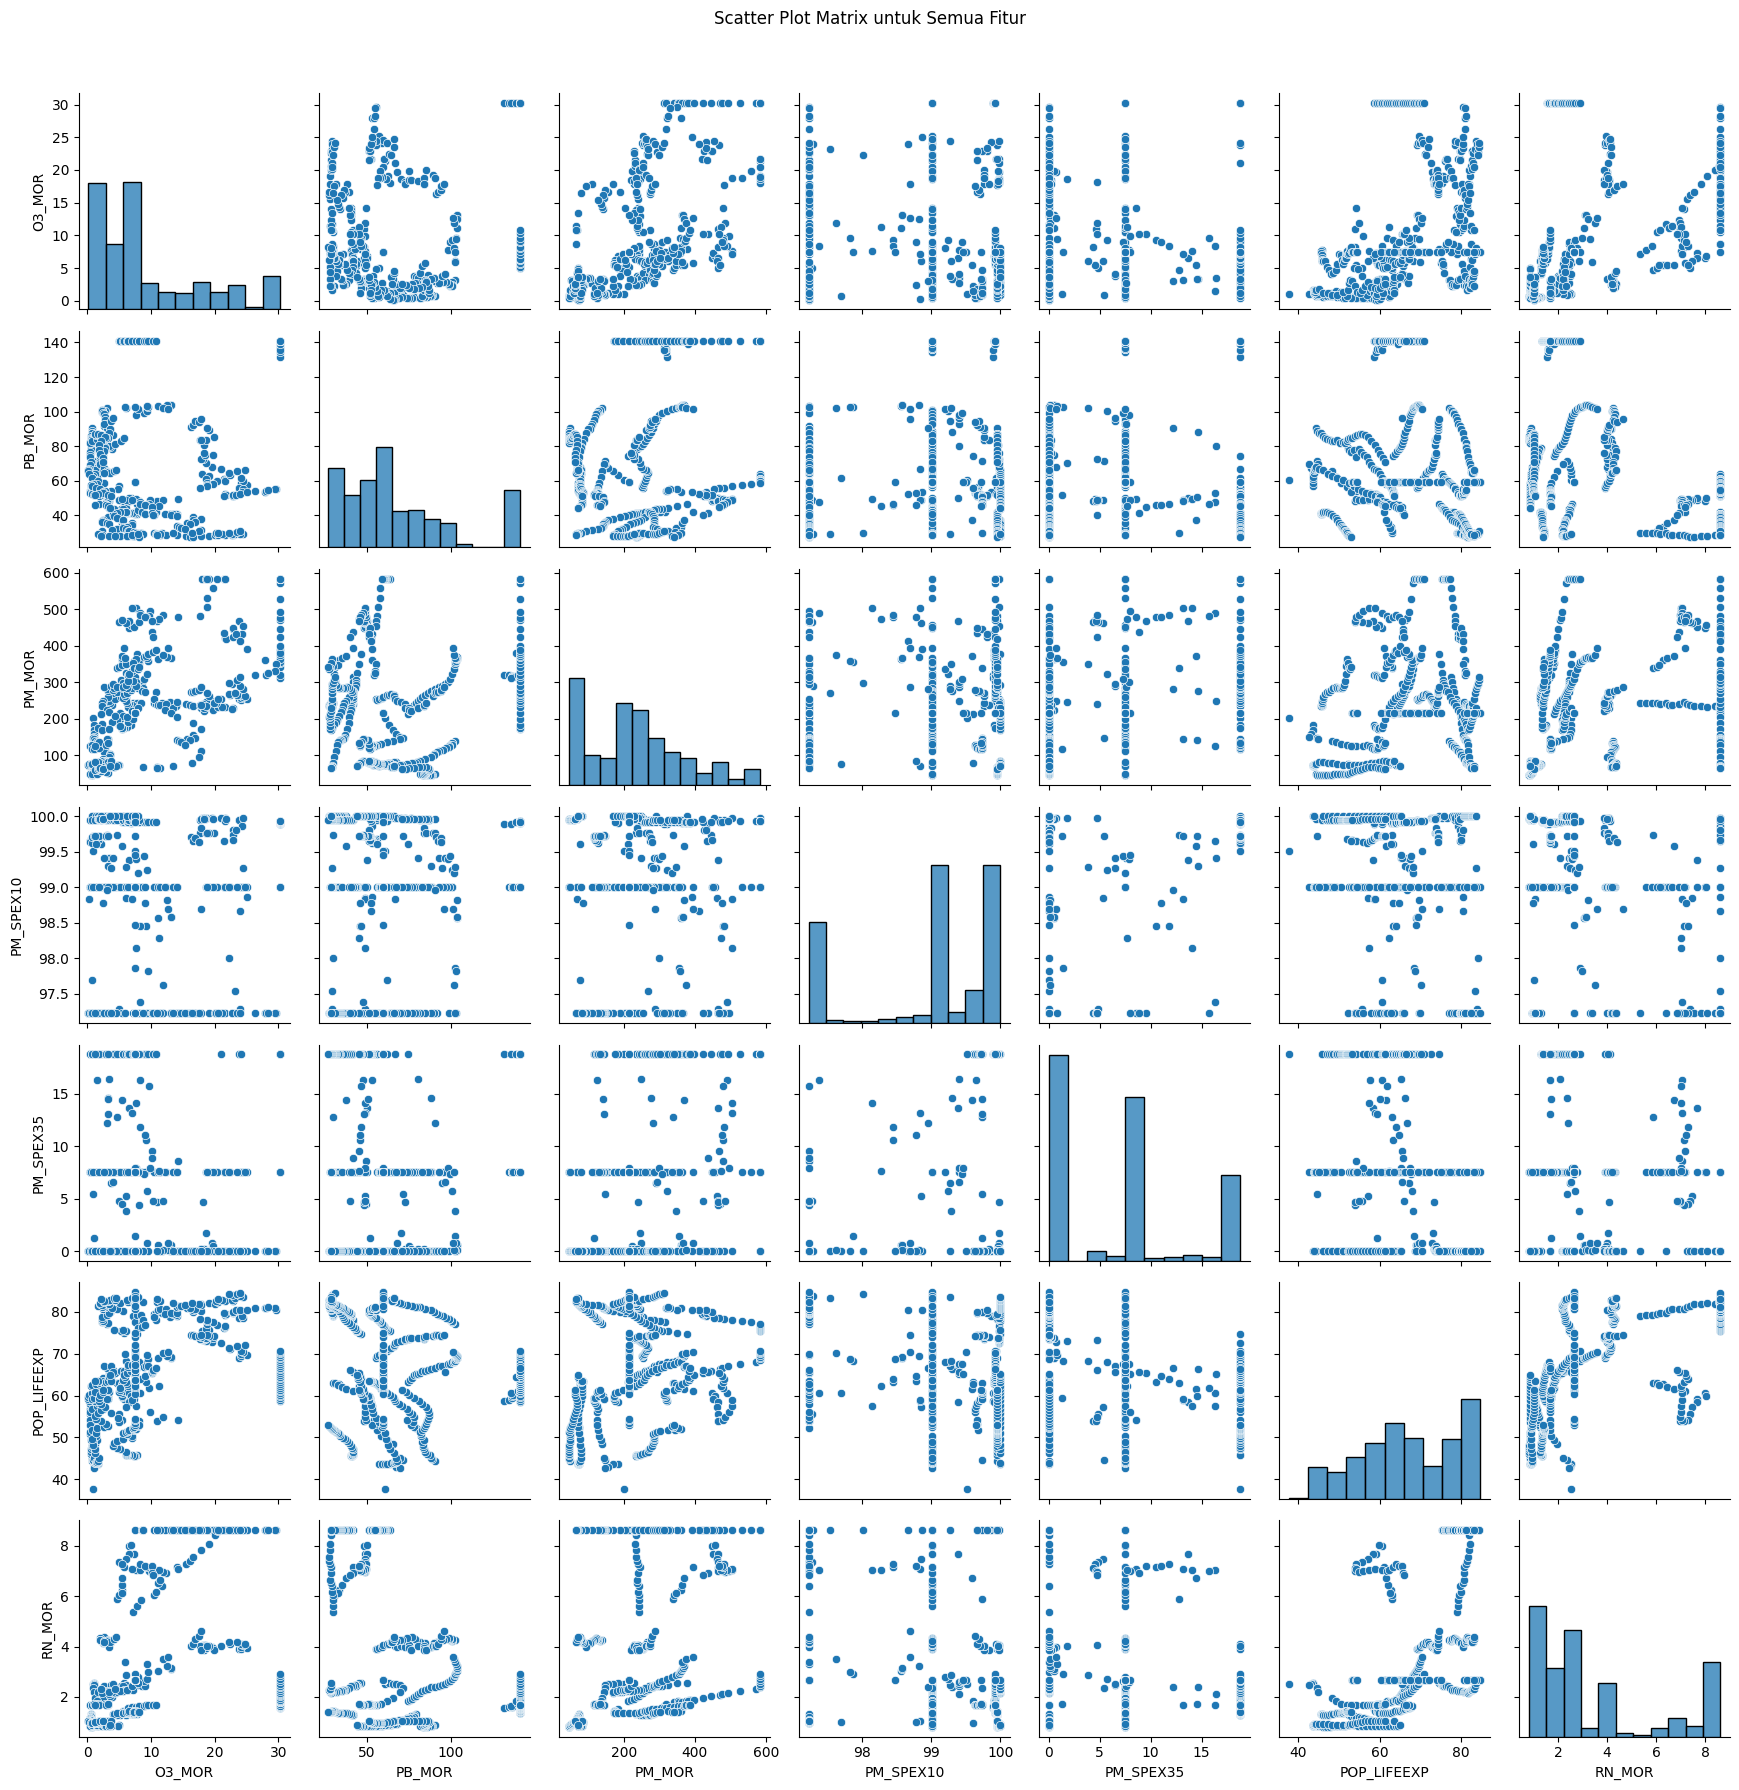

In [ ]:
def analyze_correlation(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    corr_feature = df.select_dtypes(include=[np.number]).columns

    corr_matrix = df[numeric_columns].corr()
    corr_matrix = df[corr_feature].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title("Matriks Korelasi Antar-Fitur")
    plt.show()

    print("\nPasangan fitur dengan korelasi tinggi (|r| > 0.7):")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.4f}")

    # Scatter plot matrix untuk semua fitur
    plt.figure(figsize=(12, 10))
    sns.pairplot(df[numeric_columns])  # Ganti dengan semua kolom numerik
    plt.suptitle("Scatter Plot Matrix untuk Semua Fitur", y=1.02)
    plt.tight_layout()
    plt.show()

# Jalankan fungsi
analyze_correlation(df)


In [ ]:
df.head()

column_name kategori_negara    O3_MOR  PB_MOR  PM_MOR  PM_SPEX10  PM_SPEX35  \
tahun                                                                         
1990.0           Berkembang   2.22000   74.49  212.71      99.61  18.776779   
1990.0           Berkembang  30.25625  131.74  320.01      99.90  18.776779   
1990.0           Berkembang  23.75000   55.55  252.53      99.95  18.776779   
1990.0           Berkembang   7.79000   40.65  234.54      99.95  18.776779   
1990.0           Berkembang   4.64000   29.87  338.67      99.74  12.790000   

column_name  POP_LIFEEXP  RN_MOR  
tahun                             
1990.0             63.25    1.82  
1990.0             58.62    1.55  
1990.0             69.03    3.92  
1990.0             45.73    1.33  
1990.0             62.94    5.89

### Feature Engineering

In [ ]:
kategori_negaara = {
    'Miskin':0,
    'Berkembang':1,
    'Maju':2
}

df['kategori_negara'] = df['kategori_negara'].map(kategori_negaara)

In [ ]:
# prompt: standarisasi data dengan minmax scaling kecuali colomg tahun dan kategori negara

from sklearn.preprocessing import MinMaxScaler

# Pilih kolom-kolom yang akan di-standarisasi
columns_to_scale = df.select_dtypes(include=np.number).columns.difference(['tahun','kategori_negara'])

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan standarisasi pada kolom-kolom yang dipilih
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [ ]:
df.sample(10)

column_name  kategori_negara    O3_MOR    PB_MOR    PM_MOR  PM_SPEX10  \
tahun                                                                   
2011.0                     2  0.505715  0.043142  0.152991   0.000000   
1997.0                     1  1.000000  1.000000  0.548399   0.641935   
2013.0                     2  0.828893  0.229066  0.642312   0.592609   
1998.0                     1  0.777358  0.340304  0.409004   0.641935   
2016.0                     2  0.748764  0.019155  0.464317   0.000000   
2019.0                     0  0.104734  0.160355  0.164251   0.899054   
2022.0                     0  0.241046  0.283948  0.315357   0.641935   
2018.0                     1  0.332156  0.126351  0.726376   0.000000   
2013.0                     0  0.107061  0.187681  0.071283   1.000000   
2003.0                     2  0.587174  0.007293  0.352967   0.000000   

column_name  PM_SPEX35  POP_LIFEEXP    RN_MOR  
tahun                                          
2011.0        0.000000     0.937327  1.000000  
1997.0        0.400000     0.505630  0.126761  
2013.0        0.000000     0.909496  1.000000  
1998.0        0.400000     0.725515  0.428937  
2016.0        0.000000     0.986191  1.000000  
2019.0        1.000000     0.501168  0.115237  
2022.0        0.400000     0.540259  0.235998  
2018.0        0.472392     0.596771  0.783611  
2013.0        0.000000     0.492458  0.003841  
2003.0        0.000000     0.939239  0.900128

In [ ]:
data2 = df.reset_index(drop=True)
data2.to_csv('data_clean.csv',index=False)

### Preparation

In [ ]:
df

column_name  kategori_negara    O3_MOR    PB_MOR    PM_MOR  PM_SPEX10  \
tahun                                                                   
1990.0                     1  0.067828  0.415429  0.312401   0.859396   
1990.0                     1  1.000000  0.918461  0.511431   0.963948   
1990.0                     1  0.783675  0.249012  0.386263   0.981974   
1990.0                     1  0.253024  0.118092  0.352893   0.981974   
1990.0                     1  0.148290  0.023372  0.546043   0.906264   
...                      ...       ...       ...       ...        ...   
2023.0                     0  0.241046  0.283948  0.315357   0.641935   
2023.0                     0  0.241046  0.283948  0.315357   0.641935   
2023.0                     0  0.241046  0.283948  0.315357   0.641935   
2023.0                     0  0.241046  0.283948  0.315357   0.641935   
2023.0                     0  0.241046  0.283948  0.315357   0.641935   

column_name  PM_SPEX35  POP_LIFEEXP    RN_MOR  
tahun                                          
1990.0        1.000000     0.544083  0.129321  
1990.0        1.000000     0.445719  0.094750  
1990.0        1.000000     0.666879  0.398207  
1990.0        1.000000     0.171872  0.066581  
1990.0        0.681161     0.537497  0.650448  
...                ...          ...       ...  
2023.0        0.400000     0.520926  0.235998  
2023.0        0.400000     0.552156  0.235998  
2023.0        0.400000     0.551731  0.235998  
2023.0        0.400000     0.631188  0.235998  
2023.0        0.400000     0.672615  0.235998  

[510 rows x 8 columns]

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
x = df.drop(columns='POP_LIFEEXP').reset_index(drop=True)
y = df['POP_LIFEEXP'].reset_index(drop=True)

print('X_variable: \n',x.head(),'\n')
print('Y_variable: \n', y.head())

X_variable: 
 column_name  kategori_negara    O3_MOR    PB_MOR    PM_MOR  PM_SPEX10  \
0                          1  0.067828  0.415429  0.312401   0.859396   
1                          1  1.000000  0.918461  0.511431   0.963948   
2                          1  0.783675  0.249012  0.386263   0.981974   
3                          1  0.253024  0.118092  0.352893   0.981974   
4                          1  0.148290  0.023372  0.546043   0.906264   

column_name  PM_SPEX35    RN_MOR  
0             1.000000  0.129321  
1             1.000000  0.094750  
2             1.000000  0.398207  
3             1.000000  0.066581  
4             0.681161  0.650448   

Y_variable: 
 0    0.544083
1    0.445719
2    0.666879
3    0.171872
4    0.537497
Name: POP_LIFEEXP, dtype: float64


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, random_state = 9)


In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(408, 7)
(102, 7)
(408,)
(102,)


## NO 1 - Menentukan Model Machine Learning

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

## Memilih Model Terbaik dengan Cross-validation


In [ ]:
from sklearn.model_selection import cross_val_score

model_candidate = [
    DecisionTreeRegressor(random_state=42),
    LinearRegression(),
    SVR(),
    RandomForestRegressor(random_state=42),
    xgb.XGBRegressor(objective = 'reg:squarederror')
]

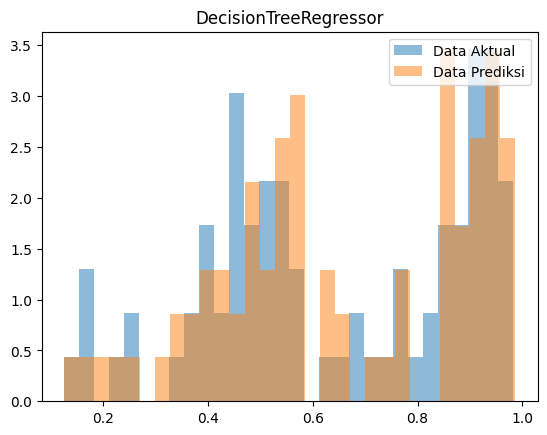

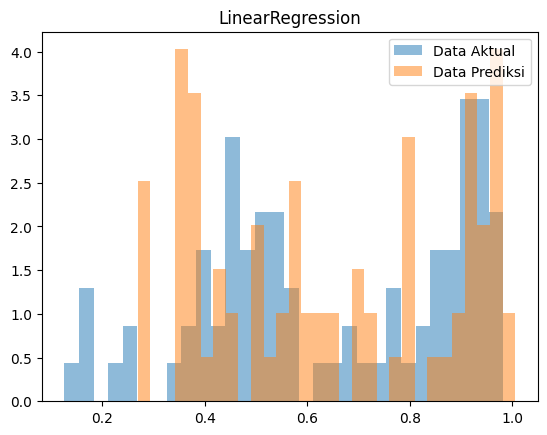

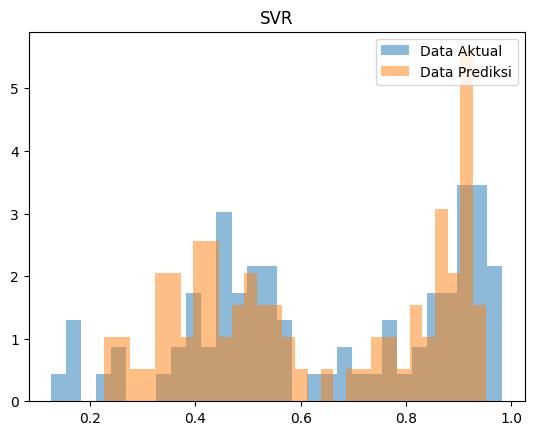

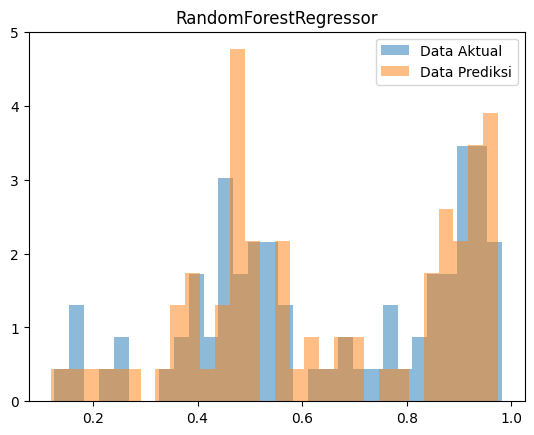

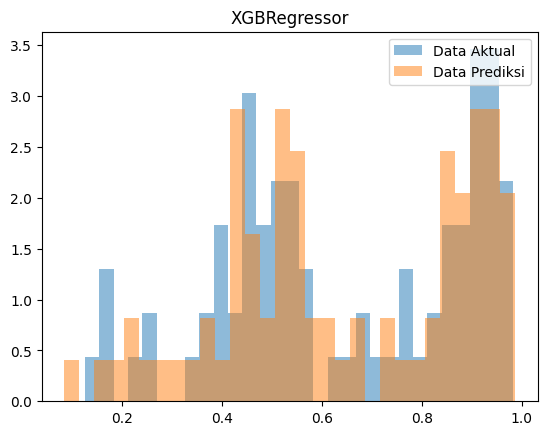

model  mean_mae  mean_mse  mean_rmse   mean_r2  \
0           XGBRegressor  0.025978  0.002051   0.044712  0.968223   
1  RandomForestRegressor  0.027185  0.002158   0.045905  0.966428   
2  DecisionTreeRegressor  0.029597  0.003290   0.055703  0.947881   
3                    SVR  0.066801  0.007278   0.084968  0.887135   
4       LinearRegression  0.105677  0.018279   0.134554  0.716776   

   ks_statistic   p_value  
0      0.068654  0.987926  
1      0.071063  0.977492  
2      0.073622  0.949574  
3      0.144625  0.383059  
4      0.166576  0.259845

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import ks_2samp
import numpy as np
ytrain = np.array(ytrain)
ytrain = ytrain.reshape(-1)

def compare_model():
    results = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for model in model_candidate:
        model_name = model.__class__.__name__
        cv_scores_mae = []
        cv_scores_mse = []
        cv_scores_rmse = []
        cv_scores_r2 = []
        ks_statistics = []
        p_values = []

        # Lakukan cross-validation
        for train_index, test_index in kf.split(xtrain):
            X_train, X_test = xtrain.iloc[train_index], xtrain.iloc[test_index]
            y_train, y_test = ytrain[train_index], ytrain[test_index]

            # Latih model
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Hitung MAE
            mae = mean_absolute_error(y_test, y_pred)
            cv_scores_mae.append(mae)

            # Hitung MSE
            mse = mean_squared_error(y_test, y_pred)
            cv_scores_mse.append(mse)

            # Hitung RMSE
            rmse = np.sqrt(mse)
            cv_scores_rmse.append(rmse)

            # Hitung R-squared (R2)
            r2 = r2_score(y_test, y_pred)
            cv_scores_r2.append(r2)

            # Hitung K-S test
            ks_stat, p_value = ks_2samp(y_test, y_pred)
            ks_statistics.append(ks_stat)
            p_values.append(p_value)

        results.append({
            'model': model_name,
            'mean_mae': np.mean(cv_scores_mae),
            'mean_mse': np.mean(cv_scores_mse),
            'mean_rmse': np.mean(cv_scores_rmse),
            'mean_r2': np.mean(cv_scores_r2),
            'ks_statistic': np.mean(ks_statistics),
            'p_value': np.mean(p_values)
        })

        plt.hist(y_test, bins=30, alpha=0.5, label='Data Aktual', density=True)
        plt.hist(y_pred, bins=30, alpha=0.5, label='Data Prediksi', density=True)
        plt.legend(loc='upper right')
        plt.title(model_name)

        plt.show()

    df_results = pd.DataFrame(results)
    df_results = df_results.sort_values(by='mean_mae', ascending=True).reset_index(drop=True)
    return df_results

compare_model()


**Penjelasan code :**
Kode ini bertujuan untuk membandingkan kinerja beberapa model prediksi menggunakan teknik validasi silang (cross-validation) dengan 5 fold. "compare_model()" melakukan proses pembagian data menjadi data latih dan uji untuk setiap model dalam "model_candidate", lalu melatih model tersebut dan menghitung rata-rata metrik evaluasi seperti MAE, MSE, RMSE, dan R² untuk setiap fold. Hasil dari setiap metrik disimpan dalam sebuah dictionary, yang kemudian diubah menjadi DataFrame untuk memudahkan analisis. Selain itu, histogram juga dibuat untuk membandingkan distribusi nilai aktual dan prediksi, sehingga pengguna dapat dengan mudah mengevaluasi kinerja model yang berbeda. Setelah selesai, fungsi ini mengembalikan DataFrame berisi hasil evaluasi yang diurutkan berdasarkan nilai MAE.

**insight hasil :**
Grafik yang ditampilkan memperlihatkan perbandingan antara hasil prediksi dan data aktual. Sumbu X menggambarkan rentang nilai (0-1), sementara sumbu Y menunjukkan frekuensi data. Histogram menunjukkan tumpang tindih antara prediksi dan aktual, menandakan bahwa model mampu memprediksi dengan baik, meskipun ada beberapa perbedaan frekuensi di beberapa interval.

Hasil evaluasi menunjukkan bahwa XGBRegressor adalah model terbaik dengan MAE terendah (0.025978) dan R-squared tertinggi (0.968223), diikuti oleh RandomForestRegressor dan DecisionTreeRegressor. Sebaliknya, Linear Regression menunjukkan performa terburuk, mengindikasikan bahwa model ensemble lebih efektif.

## NO 2 - Alasan pemilihan model
> Pada tahap ini kami memanfaatkan crossvalidation untuk membantu dalam menentukan model dengan hasil prediksi terbaik, dari beberapa kandidat model.

> Selain menggunakan metrix evaluasi MAE, MSE, RMSE dan R-Squared  sebagai alat ukur untuk melihat hasil performa model, kami juga menggunakan K-S Test yang mana dalam uji ini akan membandingkan distribusi data hasil prediksi dari model dengan distribusi data validasi yang ada pada crossvalidation

> Pada output yang dihasilkan di tahap ini, dapat disimpulkan bahwa model XGBoost memiliki nilai MAE paling rendah yang menandakan model tersebut paling minim menghasilkan error dalam prediksinya, serta P-VALUE yang mendekati 1 yang menandakan distribusi dari prediksi model ini mendekati distribusi data target

## NO 4 dan 6 - Cross-validation dan learning curve

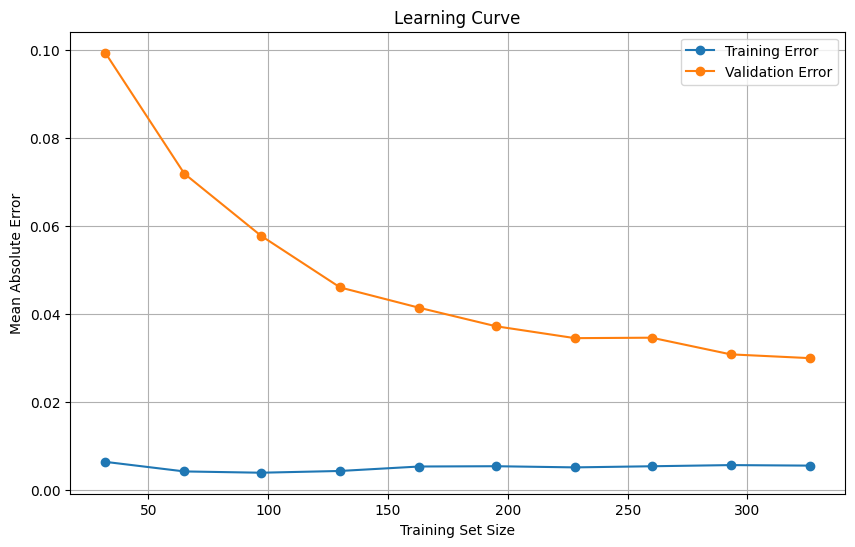

train_size  train_score  val_score
0          32     0.006428   0.099375
1          65     0.004253   0.071899
2          97     0.003959   0.057794
3         130     0.004359   0.046051
4         163     0.005370   0.041434
5         195     0.005435   0.037238
6         228     0.005172   0.034531
7         260     0.005427   0.034634
8         293     0.005692   0.030848
9         326     0.005572   0.029991

In [ ]:
from sklearn.model_selection import learning_curve

model = xgb.XGBRegressor(objective = 'reg:squarederror')

train_sizes, train_scores, val_scores = learning_curve(
    model, xtrain, ytrain, cv=5, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.1, 1, 10),n_jobs=-1
)

train_scores = -train_scores.mean(axis=1)
val_scores = -val_scores.mean(axis=1)

#ploting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores,'o-', label='Training Error')
plt.plot(train_sizes, val_scores,'o-', label='Validation Error')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()


iterasi = {'train_size': train_sizes, 'train_score': train_scores, 'val_score': val_scores}
df_iterasi = pd.DataFrame(iterasi)
df_iterasi

###### NO 5 - Penjelasan :
> pada tahap cross validation ini, kami tidak melakukan hal tersebut secara langsung melainkan kami menjalankannya di dalam proses iterasi learning curve.
yang mana learning curve sendiri bertujuan untuk memberikan informasi terkait performa model dalam beberapa tahap penggunaan data mulai dari 10% penggunaan data sampai 100% . pada tahap ini cross validation dilakukan pada setiap iterasi pada learning curve tersebut. jadi saat data yang digunakan adalah 10% maka 8% dari data tersebut akan dijadikan sebagai data train dan 2% sisanya menjadi data validation. proses ini berlanjut sampai data yang digunakan mencapai 100% yang mana pembagiannya 80% data train dan 20% data validation.

> dari hasil yang ditampilkan kita dapat melihat bahwa semakin bertambahnya data yang digunakan pada iterasi learning curve ini, model akan semakin baik dalam melakukan prediksi. hal ini juga ditunjukan pada colom val_score. yang mana kolom tersebut memberikan gambaran terkait rata-rata hasil prediksi model pada tiap iterasinya

## NO 8 - Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [200, 300],
    'min_child_weight': [1, 3],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}



grid_search = GridSearchCV(model, parameter, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

model_best = grid_search.best_estimator_
parameter_best = grid_search.best_params_
print(parameter_best)

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.8}


Hasil hyperparameter tuning menunjukkan model menggunakan bootstrapping, mengoptimalkan error absolut, tanpa batasan kedalaman pohon, dengan minimal satu sampel per daun dan dua sampel untuk membagi node. Model menggunakan 50 pohon dalam ensemble.

#### NO 7 - Learning curve setelah mendapatkan parameter terbaik

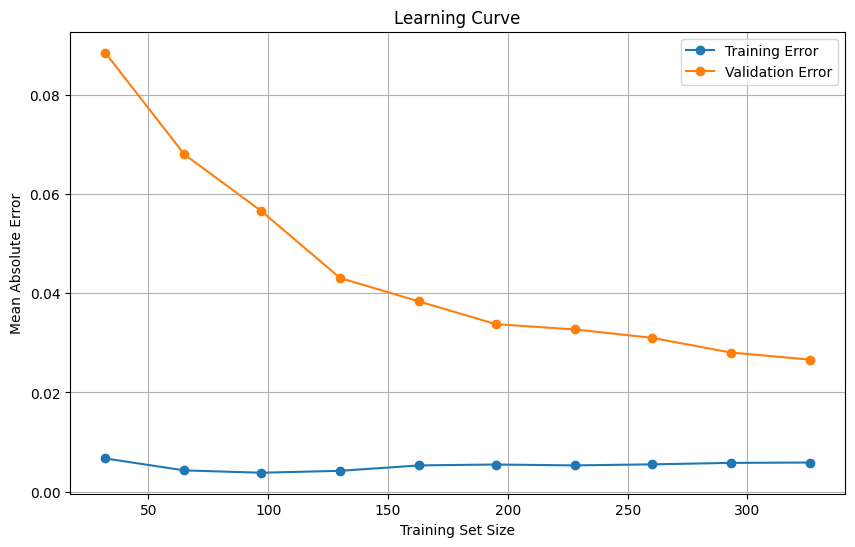

train_size  train_score  val_score
0          32     0.006687   0.088457
1          65     0.004280   0.067970
2          97     0.003811   0.056594
3         130     0.004196   0.043051
4         163     0.005284   0.038324
5         195     0.005467   0.033754
6         228     0.005287   0.032682
7         260     0.005496   0.031009
8         293     0.005792   0.028037
9         326     0.005864   0.026606

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    model_best, xtrain, ytrain, cv=5, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.1, 1, 10),n_jobs=-1
)

train_scores = -train_scores.mean(axis=1)
val_scores = -val_scores.mean(axis=1)

#ploting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores,'o-', label='Training Error')
plt.plot(train_sizes, val_scores,'o-', label='Validation Error')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()


iterasi = {'train_size': train_sizes, 'train_score': train_scores, 'val_score': val_scores}
df_iterasi = pd.DataFrame(iterasi)
df_iterasi

Grafik ini menunjukkan learning curve dari model XGBoost yang sudah dilengkapi dengan parameter terbaik yang dihasilkan dari proses hyperparameter tuning berdasarkan nilai error MSE

*   Garis biru: Mewakili kinerja model pada data training. Kurva ini hampir menurun di setiap penambahan data dengan error yang sangat rendah.

*   Garis orange: Mewakili kinerja model pada data validasi melalui cross-validation. Pada awalnya, error pada data validasu lebih tinggi, tetapi menurun seiring bertambahnya jumlah data.

Interpretasi:

*   Error pada data training dan validation menurun seiring dengan bertambahnya jumlah data. Ini menunjukkan bahwa model belajar lebih baik dengan lebih banyak data, dan kesalahan pada training set semakin kecil. Namun, error pada validation memulai dengan nilai yang lebih tinggi dibandingkan training error. Ini umum terjadi, dan biasa disebabkan karena jumlah data yang terlalu sedikit.
*   Error pada data validasi mengalami penurunan yang konsisten, menunjukkan bahwa menambah data pelatihan membantu mengurangi overfitting dan meningkatkan generalisasi model.
*   Pada sekitar 250–300, penurunan error menjadi lambat dan mencapai nilai yang stabil. Ini terjadi karena model hampir mencapai batas kemampuannya untuk mempelajari pola dalam data training.

**Kesimpulan:**
Secara keseluruhan, model menunjukkan kinerja yang semakin baik dengan bertambahnya data pelatihan, karena error pada data validasi memiliki pola yang sama dengan error pada data train dan pola tersebut juga menurun seiring dengan penambahan jumlah data. error terus menurun.
Overfitting mulai teratasi saat data bertambah, meskipun masih ada sedikit gap antara training dan validation error.


## NO 8 - Boostraping

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import mean_absolute_error

n_iteration = 10
score_prediksi = []

for i in range(n_iteration):
  Xbootstrap, Ybootstrap = resample(xtrain, ytrain,replace = True)

  boostrap_index = Xbootstrap.index

  oob_index = ~xtrain.index.isin(boostrap_index)
  x_val = xtrain[oob_index]
  y_val = ytrain[oob_index]

  model = model_best
  model.fit(Xbootstrap, Ybootstrap)

  predic = model.predict(x_val)
  mae = mean_absolute_error(predic, y_val)
  score_prediksi.append({
      'iteration': 'iterasi : '+ str(i+1),
      'score': mae
  })


df_score = pd.DataFrame(score_prediksi).reset_index(drop=True)
df_score

iteration     score
0   iterasi : 1  0.023155
1   iterasi : 2  0.036196
2   iterasi : 3  0.032082
3   iterasi : 4  0.031875
4   iterasi : 5  0.031828
5   iterasi : 6  0.029152
6   iterasi : 7  0.039323
7   iterasi : 8  0.028202
8   iterasi : 9  0.022114
9  iterasi : 10  0.025412

##### Penjelasan
> Pada tahap bootstrapping ini kami sekali lagi memastikan performa model dengan mengujinya pada data resampling yang dilakukan di tahap ini. Pada tahap ini kami melakukan 10 iterasi, yang setiap iterasinya model di train dan ditest dengan data yang berbeda - beda. Untuk train model diberikan data dari hasil resampling dan ditest dengan data yang tidak masuk pada kelompok resampling tersebut (out-of-bag).
*   Dapat dilihat pada 10 iterasi ini, nilai error berkisar antara 0.023739 hingga 0.035422.
*   Nilai error relatif konsisten, yaitu rata-rata sebagian besar bernilai 0.031, menunjukkan bahwa estimasi model cenderung stabil.
*   Variasi score yang tidak terlalu besar (selisih maksimum hanya sekitar 0.012) menunjukkan bahwa model memiliki ketahanan yang baik terhadap perubahan kecil dalam data (resampling), yang berarti hasil estimasinya relatif stabil.

> **Kesimpulan:** Pada output yang dihasilkan kita dapat melihat, meskipun model diuji dengan data yang bervariasi dan acak namun hasil performa model masih dalam rentan jarak yang tidak terlalu berbeda pada setiap iterasinya.

### Final Evaluaion dengan data Test

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

final_model = model_best

model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

# Menghitung MAE
mae = mean_absolute_error(y_pred, ytest)
print("Mean Absolute Error (MAE):", mae)

# Menghitung MSE
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error (MSE):", mse)

# Menghitung RMSE
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

# Menghitung R-squared
r_squared = r2_score(ytest, y_pred)
print("R-squared:", r_squared)

Mean Absolute Error (MAE): 0.028701290516191667
Mean Squared Error (MSE): 0.003845367728933362
Root Mean Squared Error (RMSE): 0.06201102909106865
R-squared: 0.9346906828223981


>**penjelasan code** : Kode ini digunakan untuk mengevaluasi performa model regresi. Model terbaik (model_best) dilatih menggunakan data pelatihan (xtrain dan ytrain) dan kemudian memprediksi nilai pada data pengujian (xtest). Hasil prediksi disimpan dalam y_pred. Mean Absolute Error (MAE) dihitung untuk mengukur kesalahan rata-rata antara prediksi dan nilai sebenarnya (ytest). Selain itu, kode juga menghitung Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared untuk memberikan gambaran lebih lengkap tentang akurasi model.

>**insight hasil** : Hasil evaluasi menunjukkan model berkinerja baik. MAE sebesar 0.0287 dan MSE 0.0038 menunjukkan kesalahan prediksi yang rendah. RMSE sebesar 0.0620 menunjukkan kesalahan minimal, sementara R-squared 0.9347 menunjukkan model mampu menjelaskan 93.47% variasi data. Secara keseluruhan, model ini efektif dan dapat diandalkan untuk prediksi.

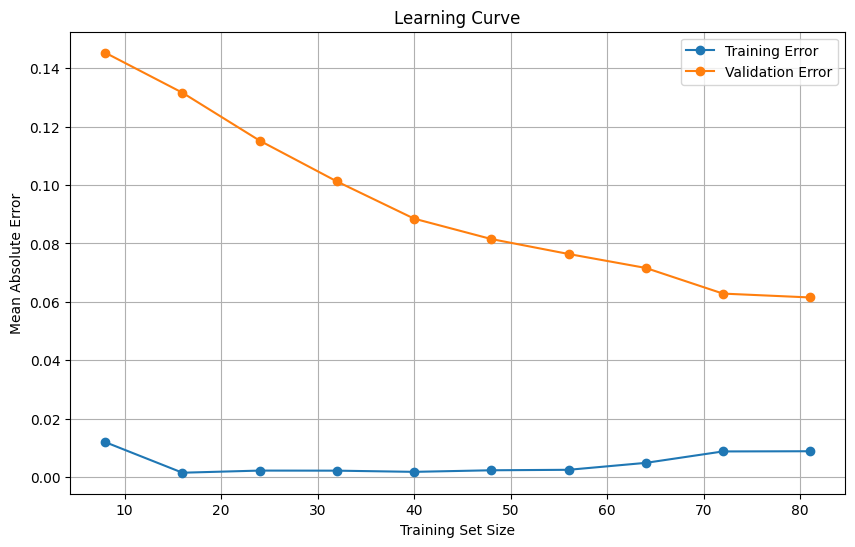

train_size  train_score  val_score
0           8     0.011988   0.145310
1          16     0.001519   0.131606
2          24     0.002251   0.115206
3          32     0.002225   0.101243
4          40     0.001817   0.088504
5          48     0.002355   0.081520
6          56     0.002519   0.076407
7          64     0.004893   0.071627
8          72     0.008805   0.062846
9          81     0.008873   0.061527

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(
    model_best, xtest, ytest, cv=5, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.1, 1, 10),n_jobs=-1
)

train_scores = -train_scores.mean(axis=1)
val_scores = -val_scores.mean(axis=1)

#ploting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores,'o-', label='Training Error')
plt.plot(train_sizes, val_scores,'o-', label='Validation Error')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()

iterasi = {'train_size': train_sizes, 'train_score': train_scores, 'val_score': val_scores}
df_iterasi = pd.DataFrame(iterasi)
df_iterasi

> Penjelasan

> Learning curve ini merupakan hasil dari data setelah dilakukan bootstraping.
*   Pada learning curve tersebut dilihat pada data training  menunjukkan bahwa error  tetap rendah meskipun jumlah data pelatihan meningkat. Ini menunjukkan bahwa model mampu mempelajari data pelatihan dengan baik, karena error pada data pelatihan sangat kecil dan stabil. Pada data training tidak terdapat indikasi overfitting yang signifikan karena dapat dilihat error tidak meningkat secara drastis dengan bertambahnya data.
*   Error pada validasi awalnya tinggi dengan set data pelatihan kecil, tetapi menurun dan stabil seiring bertambahnya data, menandakan model semakin baik dalam melakukan generalisasi. Pada titik tertentu sekitar pada set data berjumlah 60 hingga 80, error validasi mulai stabil, menunjukkan bahwa model telah belajar dari data dan mulai generalisasi dengan baik pada data baru.

> **Kesimpulan:**
Kurva pelatihan yang rendah dan stabil menunjukkan model belajar dengan baik tanpa overfitting atau underfitting. Kurva validasi yang menurun dan stabil mengindikasikan model semakin baik dalam generalisasi seiring bertambahnya data.

## NO 9 - Metric Evaluation

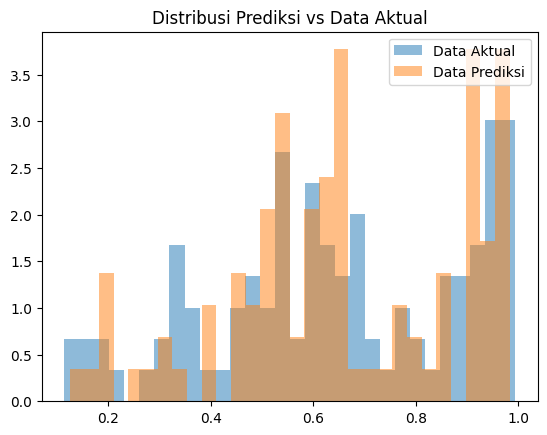

MAE       MSE      RMSE  R-squared        KS   P-value
0  0.028701  0.003845  0.062011   0.934691  0.078431  0.914408

In [ ]:
from scipy.stats import ks_2samp
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ytest = ytest.reshape(-1)
# y_pred = np.array(y_pred)

y_pred = model.predict(xtest)
mae = mean_absolute_error(y_pred, ytest)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(ytest, y_pred)

ks_stat, p_value = ks_2samp(ytest, y_pred)

# Visualisasi distribusi prediksi dan target aktual
plt.hist(ytest, bins=30, alpha=0.5, label='Data Aktual', density=True)
plt.hist(y_pred, bins=30, alpha=0.5, label='Data Prediksi', density=True)
plt.legend(loc='upper right')
plt.title('Distribusi Prediksi vs Data Aktual')
plt.show()

# Menyimpan hasil dalam dataframe
result = {'MAE':mae, 'MSE': mse, 'RMSE': rmse, 'R-squared': r_squared, 'KS':ks_stat, 'P-value':p_value}
df_result = pd.DataFrame(result, index=[0])
df_result

**Penjelasan code** :
Kode ini menggunakan beberapa variabel untuk mengevaluasi performa model prediksi. Variabel "model" adalah objek model yang telah dilatih, sementara "xtest" adalah data fitur untuk menguji model dan "ytest" adalah data target aktual yang ingin diprediksi. Hasil prediksi disimpan dalam variabel "y_pred". Metrik evaluasi seperti Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared dihitung untuk menilai akurasi model. Uji Kolmogorov-Smirnov (K-S) dilakukan untuk membandingkan distribusi data aktual dan prediksi, dengan hasil disimpan dalam variabel "ks_stat" dan "p_value". Semua hasil evaluasi disimpan dalam sebuah DataFrame untuk analisis lebih lanjut.

**Insight hasil** :    
Hasil evaluasi model menunjukkan performa yang baik dengan MAE sebesar 0.028701, yang berarti kesalahan rata-rata prediksi cukup kecil. MSE dan RMSE yang masing-masing sebesar 0.003845 dan 0.062011 menunjukkan bahwa kesalahan model juga rendah. Nilai R-squared sebesar 0.934691 menandakan bahwa model dapat menjelaskan sekitar 93.47% dari variasi data, yang merupakan indikasi kuat bahwa model ini efektif.

Selain itu, K-S statistic sebesar 0.078431 dan P-value sebesar 0.914408 (> 0,5) menunjukkan tidak ada perbedaan signifikan antara distribusi data aktual dan prediksi, mengkonfirmasi bahwa model bekerja dengan baik.

## NO 10 - Interpretasi dari hasil metric evaluation
> **MAE**

> Dapat kita lihat nilai Mean Absolut Error (MAE) adalah 0.028701, ini berarti rata-rata perbedaan absolut antara prediksi model dan nilai sebenarnya adalah sekitar 0.028701 satuan.

> Nilai MAE pada model ini tergolong rendah yaitu 0.028701, menunjukkan bahwa prediksi model sangat dekat dengan nilai sebenarnya atau kinerja model relatif baik karena menunjukkan bahwa rata-rata kesalahan prediksi relatif kecil.

> Dengan nilai MAE yang rendah, model dapat dianggap memiliki akurasi yang cukup baik dalam memprediksi data test. Artinya, rata-rata kesalahan yang dibuat oleh model dalam memprediksi tidak terlalu besar.

> **MSE**

> Nilai Mean Squared Error (MSE) yang dihasilkan pada model ini adalah 0.003845, yang artinya rata-rata kuadrat dari kesalahan antara nilai prediksi dan nilai sebenarnya adalah sekitar 0.003845. MSE memberikan penalti yang lebih besar untuk kesalahan prediksi yang besar, karena kesalahan tersebut dikuadratkan.

> Dengan nilai MSE yang rendah, dapat disimpulkan bahwa model ini memiliki performa yang baik dalam membuat prediksi yang dekat dengan nilai sebenarnya. Ini menunjukkan bahwa secara umum kesalahan prediksi dari model ini cukup kecil dan tersebar merata.

> **RMSE**

> Nilai Root Mean Squared Error (RMSE) pada model ini adalah 0.062011, yang merupakan akar dari nilai MSE. RMSE lebih mudah diinterpretasikan karena berada dalam satuan yang sama dengan variabel target.

> RMSE digunakan untuk memberi gambaran seberapa besar kesalahan prediksi rata-rata yang dilakukan model, dan nilai yang rendah menunjukkan bahwa model ini mampu membuat prediksi dengan kesalahan yang kecil. Dengan RMSE sebesar 0.062011, model ini cukup akurat karena rata-rata kesalahan prediksi hanya sedikit di atas 6% dari satuan variabel.

> **R-squared**

> Nilai R-squared atau koefisien determinasi pada model ini adalah 0.934691, yang artinya model mampu menjelaskan sekitar 93,47% dari variabilitas data aktual. Ini adalah indikasi yang sangat baik, karena nilai R-squared berkisar antara 0 hingga 1, dan semakin mendekati 1, semakin baik model dalam menjelaskan pola data.

> Dengan R-squared yang tinggi, dapat disimpulkan bahwa model ini tidak hanya mampu memprediksi nilai dengan akurat, tetapi juga dapat menangkap pola variabilitas yang ada di dalam data, yang berarti model bekerja dengan sangat baik dalam memetakan hubungan antara variabel input dan output.

> **KS-Test**

> KS-Test pada analisis ini digunakan untuk menguji apakah kedua data y_test dan y_pred bersal dari distribusi yang sama. Dapat dilihat hasil uji KS menunjukan nilai 0,078431 dengan p-value > 0,5 yang berarti bahwa kedua sampel berasal dari distribusi yang sama. Hal itu berarti model bekerja dengan baik dalam mereplikasi pola distribusi data asli.

> Secara keseluruhan, dengan nilai MSE, RMSE, dan R-squared yang sangat baik, model ini memiliki performa yang optimal dalam memprediksi data aktual, menghasilkan prediksi yang sangat akurat, serta memetakan pola distribusi data dengan baik.

### - Alasan pemilihan metric

> Model yang kami gunakan adalah supervised learning dengan jenis XGBoost Regressor, disini kami akan memprediksi angka harapan hidup. Oleh karena itu, metrik yang kami pilih untuk evaluasi adalah MAE, MSE, RMSE, dan R-squared. Selain itu, kami juga menggunakan metrik Kolmogorov-Smirnov (KS) dengan nilai p-value yang menggambarkan perbedaan distribusi antara nilai prediksi dan nilai aktual. P-value ini juga digunakan untuk menguji signifikansi variabel dalam model regresi.

> Kami memilih metrik-metrik ini karena mereka memberikan gambaran menyeluruh tentang kinerja model, dari kesalahan rata-rata hingga kemampuan model dalam menjelaskan variabilitas data. Kombinasi metrik-metrik ini memastikan bahwa performa model dinilai dari berbagai sudut pandang, menjadikannya lebih andal dan informatif dalam analisis prediksi serta memastikan hasil prediksi yang akurat dan mudah diinterpretasikan.

